# **Car Prices Prediction Using Various ML Techniques**

Car companies set different prices of cars based on certain factors and paramneters. Here, we will try to figure out if a new company is planning to invest in manufacturing cars,then which car parameters will be inportant for the company to set price.

We will look at the the kaggle dataset (https://www.kaggle.com/CooperUnion/cardataset) and try to explore some meeningful insights about car prices and will also evaluate various machine learning models to find out which model fits best for such kind of analysis and prediction.

In [ ]:
%pip install category_encoders

In [142]:
#importing useful libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1.5 Reading the data
We would be using pandas to read the data. We would be storing that in a variable called 'data' for various calculations later.

In [201]:
data = pd.read_csv('data(1).csv')

In [148]:
data.shape

(11914, 16)

In [150]:
data.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10270,Chevrolet,Tahoe,2017,flex-fuel (unleaded/E85),355.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Flex Fuel,Performance",Large,4dr SUV,23,16,1385,52345
7724,Mazda,Protege5,2003,regular unleaded,130.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Wagon,28,22,586,16895
3861,Hyundai,Elantra,2015,regular unleaded,173.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,34,24,1439,21600
295,Ferrari,360,2002,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,10,2774,140615
1010,Porsche,968,1994,regular unleaded,236.0,4.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,24,15,1715,4191


# **Exploratory Data Analysis**

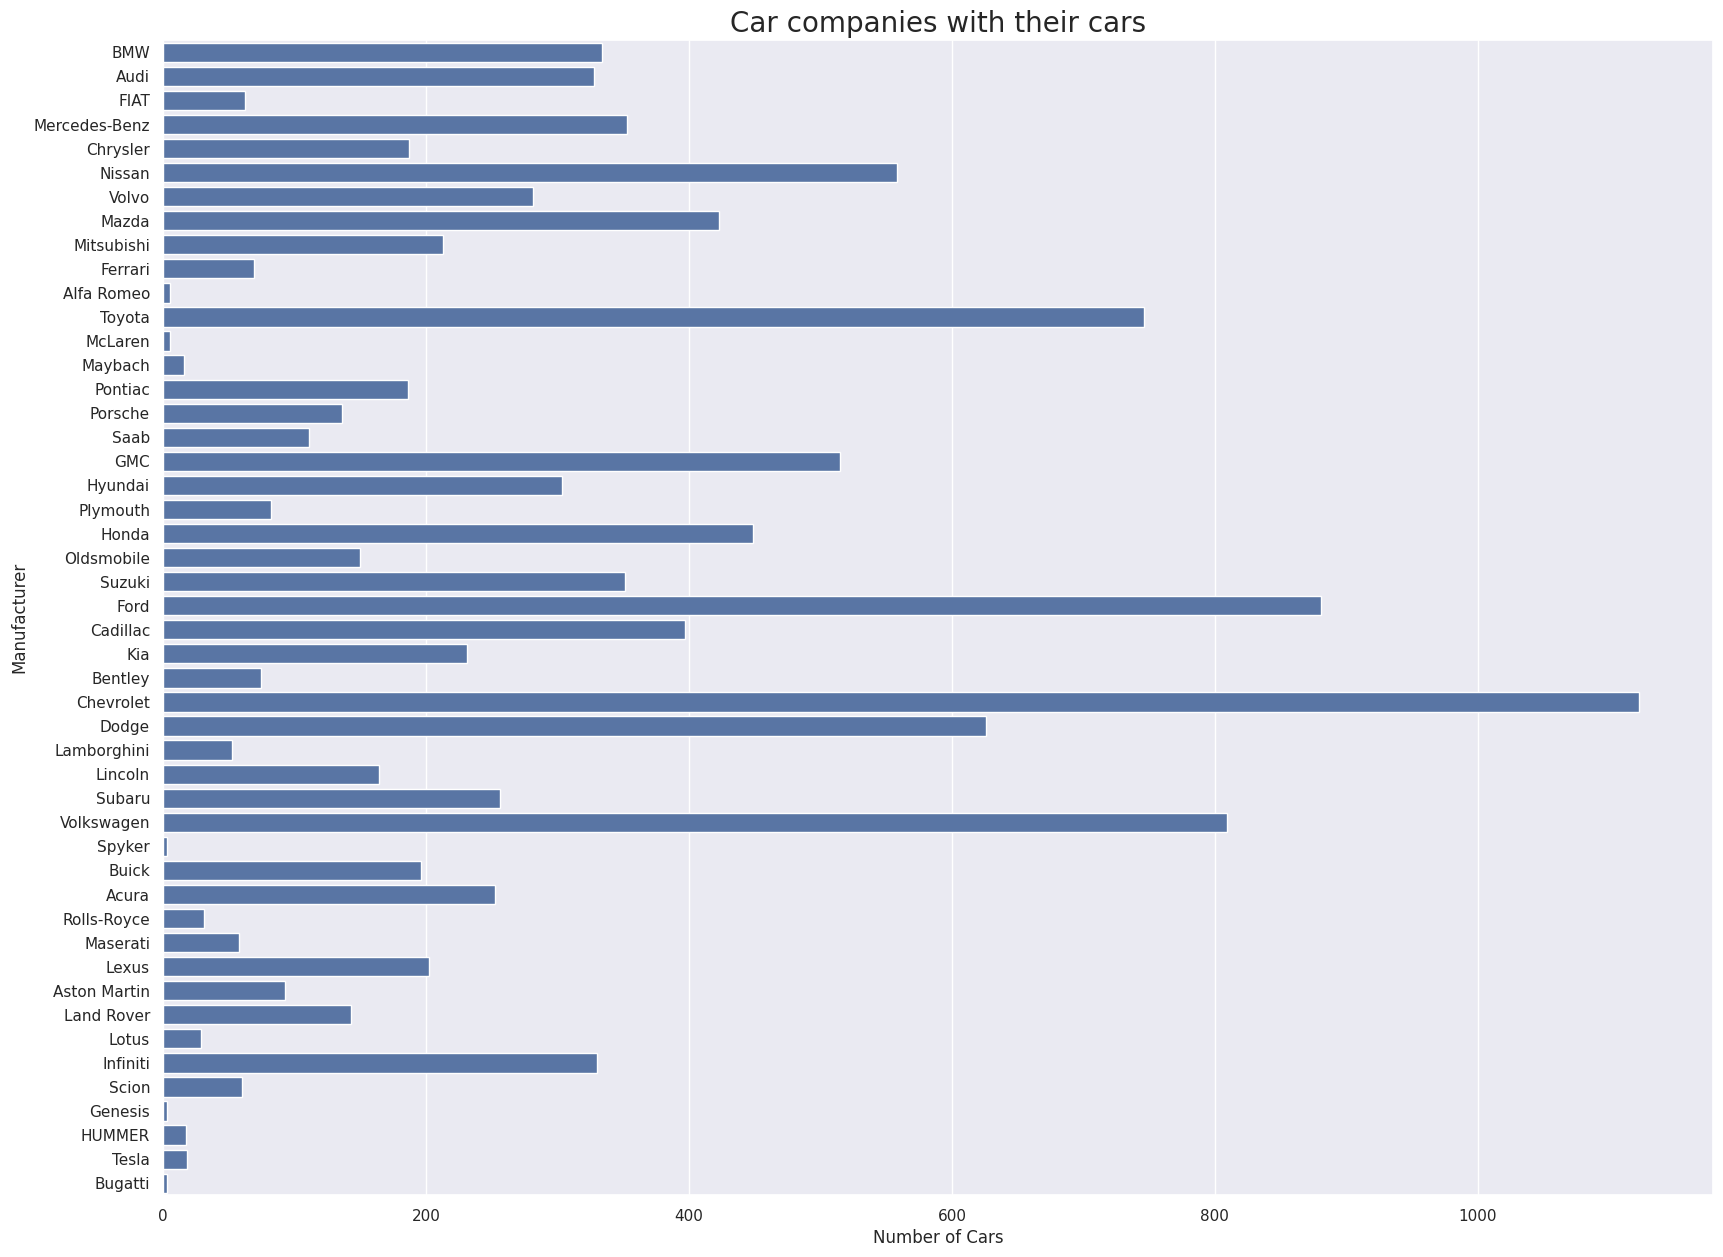

In [151]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.xlabel("Number of Cars")
plt.ylabel("Manufacturer")
plt.show()

Chevrolet along with Ford and Volkswagen produce the most number of cars.

## 2.1.3 Counting the cars based on transmission type

We are all interested in cars that are automatic as they are really easy to handle and efficient. In addition to this, most of the manual cars are being replaced by automatic cars and thus, we don't have a lot of demand for manual cars. That is being reflected here in the dataset. We see that when we see the total number of cars based on transmission type, we find that there are many automatic cars as compared to the cars that are manual. There are a few automatic_manual cars that is second option for the buyer of the cars. Thus, we could see that most of the cars that we have chosen in our dataset are automatic.

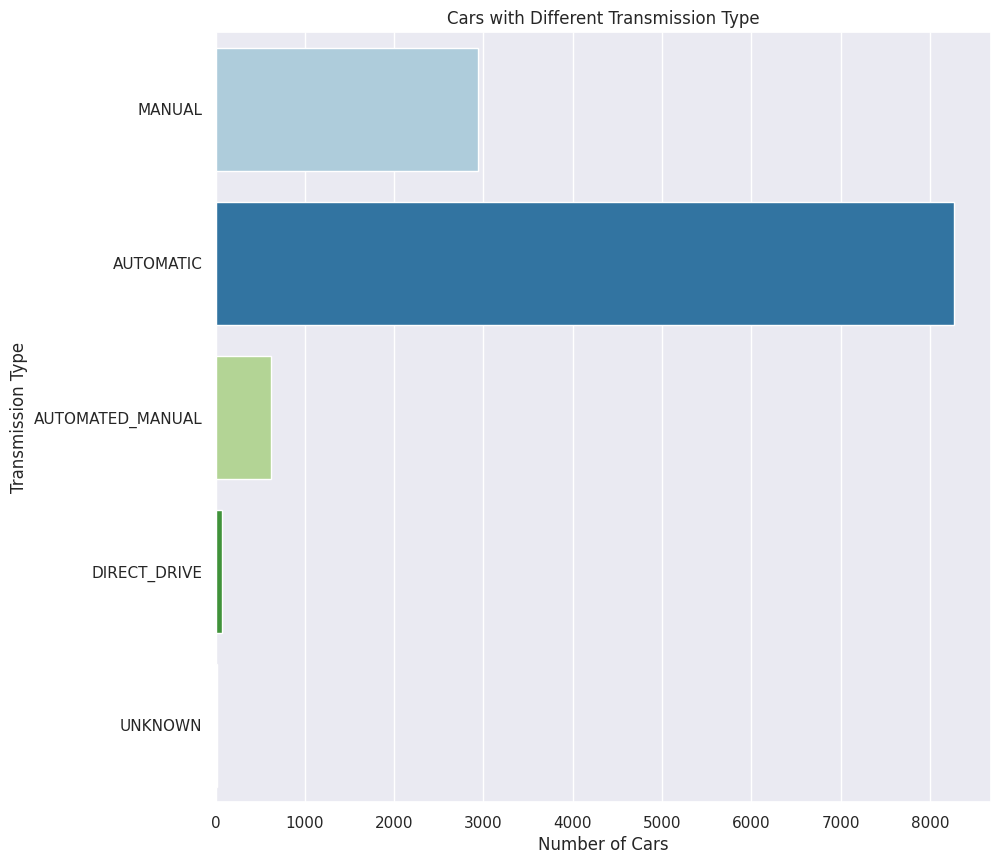

In [153]:
plt.figure(figsize = (10, 10))
sns.countplot(data['Transmission Type'], palette = 'Paired')
plt.title("Cars with Different Transmission Type")
plt.xlabel("Number of Cars")
plt.ylabel("Transmission Type")
plt.show()

In [154]:
data.nunique()

,0
Make,48
Model,915
Year,28
Engine Fuel Type,10
Engine HP,356
Engine Cylinders,9
Transmission Type,5
Driven_Wheels,4
Number of Doors,3
Market Category,71


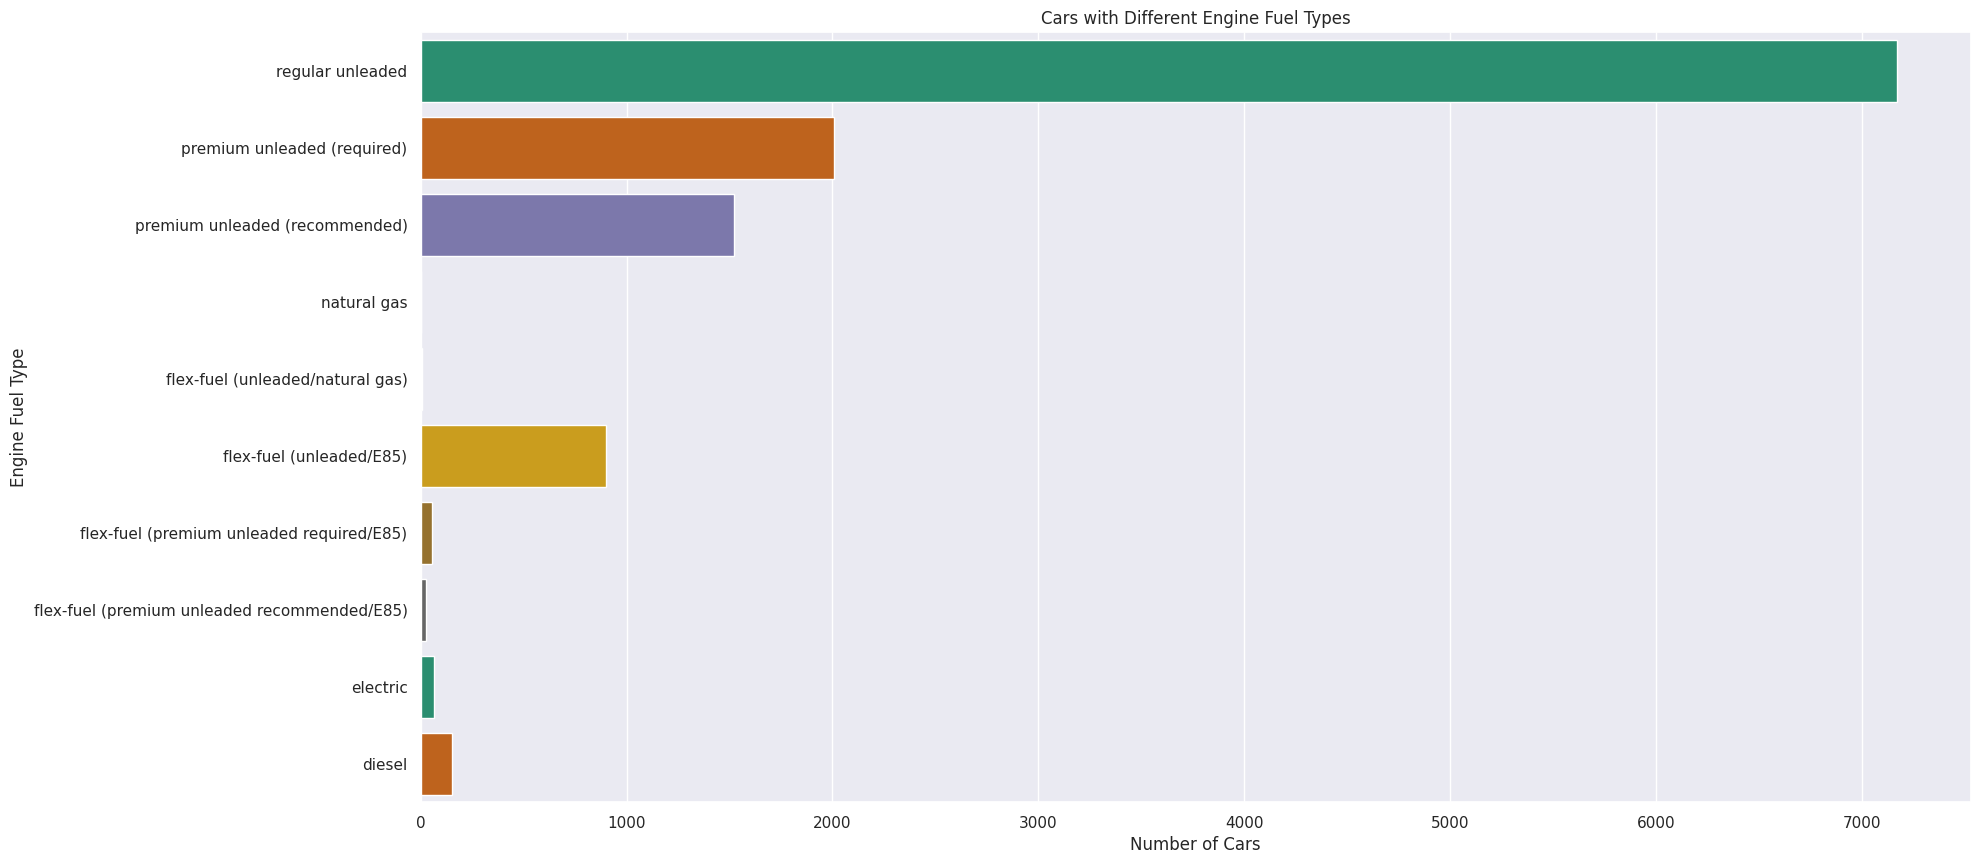

In [158]:
plt.figure(figsize = (20, 10))
sns.countplot(y = data['Engine Fuel Type'].sort_values(ascending = False), palette = 'Dark2')
plt.title("Cars with Different Engine Fuel Types")
plt.xlabel("Number of Cars")
plt.ylabel("Engine Fuel Type")
plt.show()

Majority of the vehicles are using regular unleaded fuel type while very few are using environment friendly electric or natural gas.

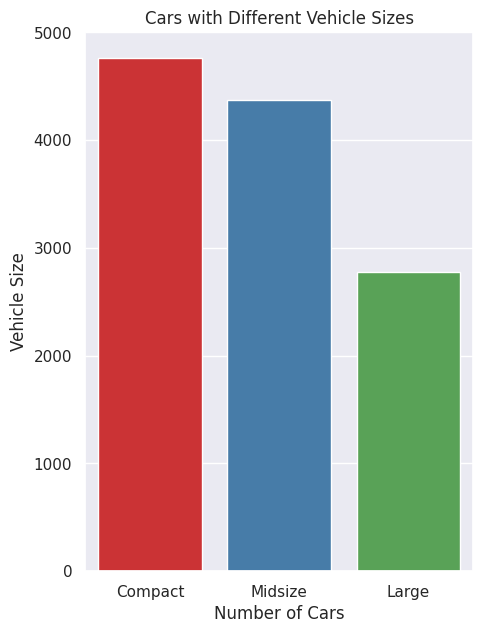

In [162]:
plt.figure(figsize = (5, 7))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')
plt.title("Cars with Different Vehicle Sizes")
plt.xlabel("Number of Cars")
plt.ylabel("Vehicle Size")
plt.show()

Compact cars are manufactured most followed by midsize cars whereas large cars are few in numbers.

## Groupby with 'Make' feature

We would be making use of groupby which would take into consideration the feature that would be grouped on and it would perform different operations after grouping such as finding the minimum element in particular group, maximum element in a particular group and so on. Here, we see that we have grouped the data on the basis of 'Make' and considered a few features such as 'Engine HP', 'Engine Cylinders', 'highway MPG' and 'city mpg'. We would be then looking at the maximum values, minimum values and mean of the data.

In [202]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

## Grouping the data on the basis of Year

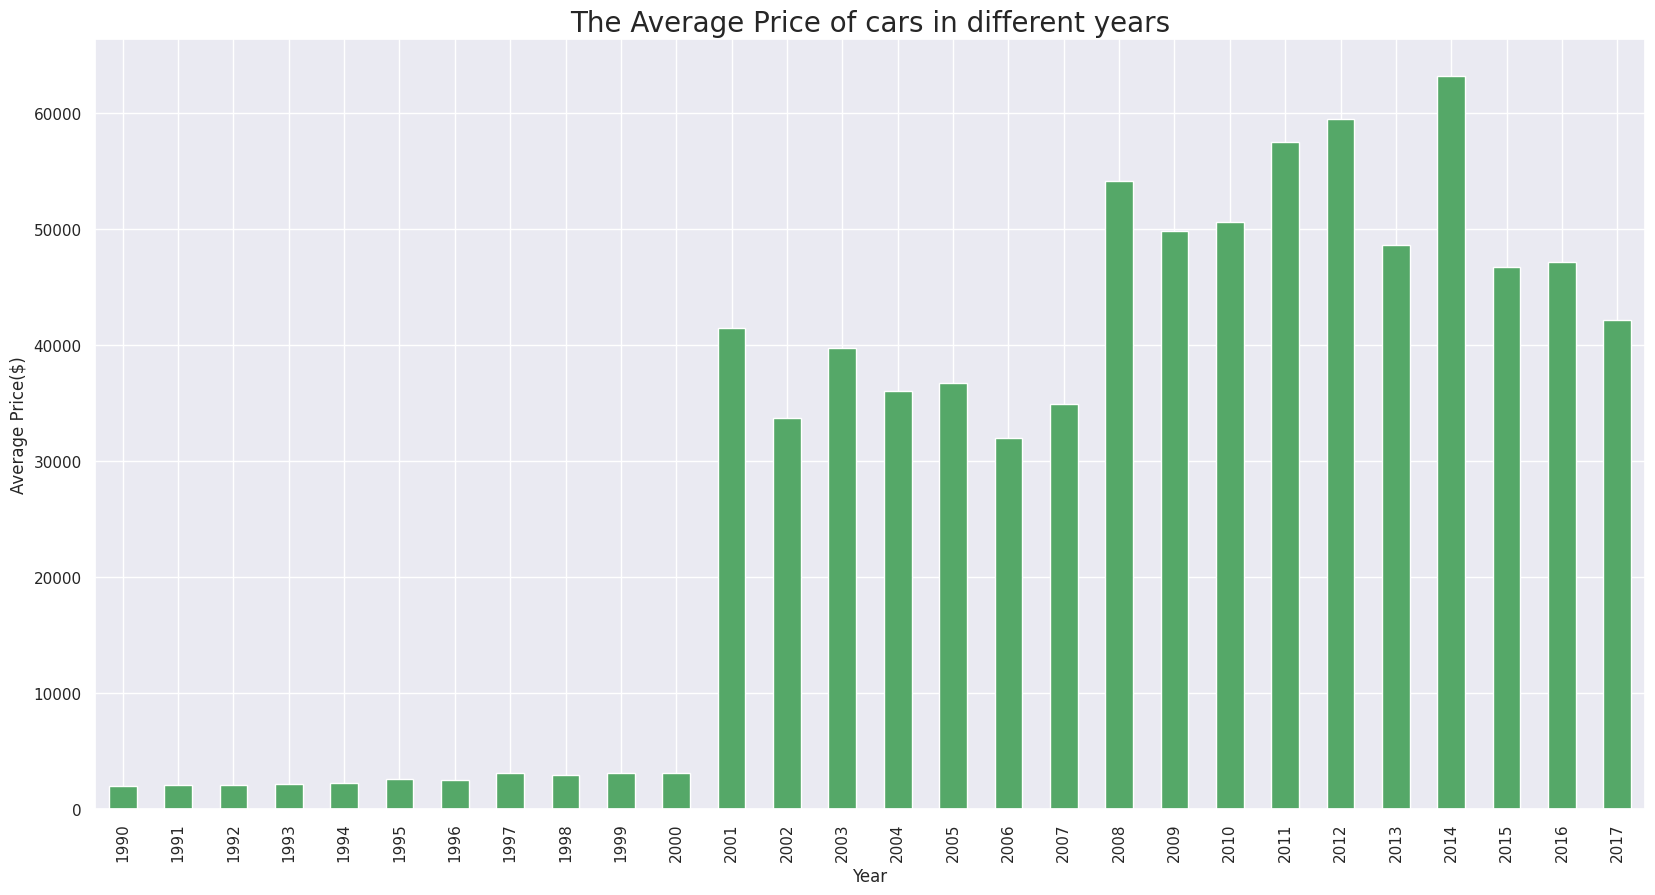

In [163]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.xlabel("Year")
plt.ylabel("Average Price($)")
plt.show()


We can observe that the prices went up drastocally after 2000 and then again in 2008

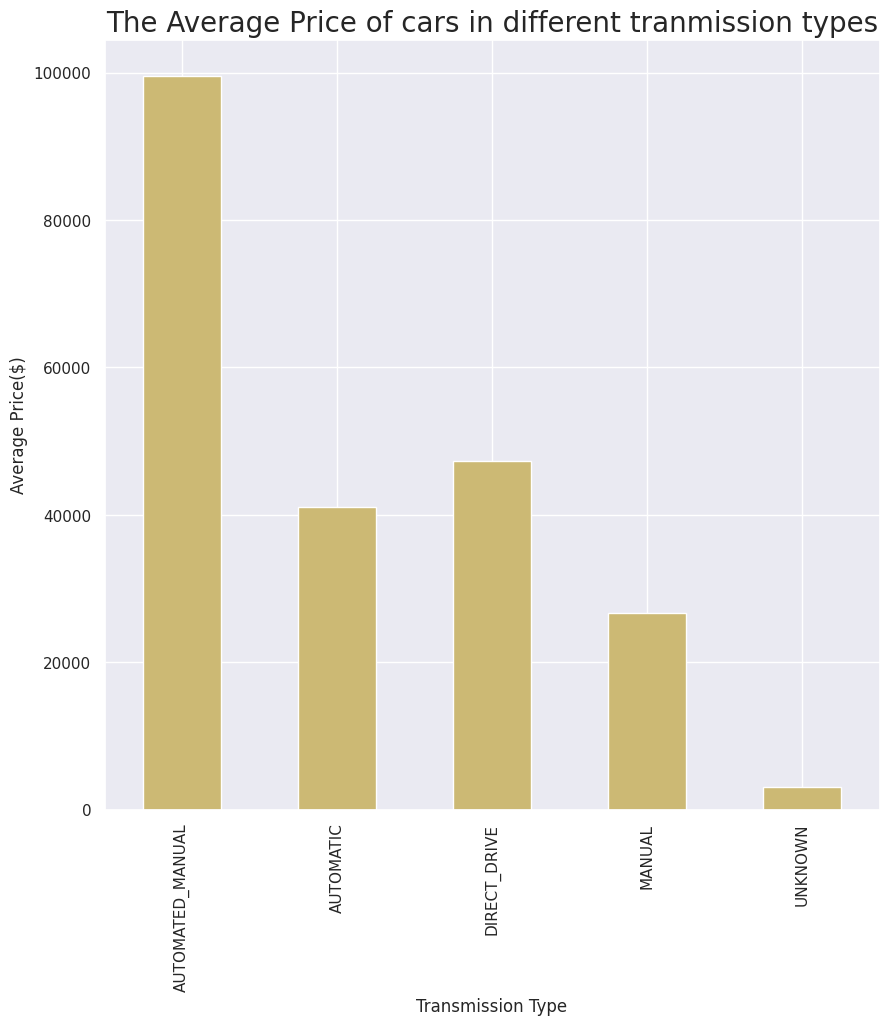

In [165]:
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.xlabel("Transmission Type")
plt.ylabel("Average Price($)")
plt.show()


## 2.4 Scatterplot between 'highway MPG' and 'city mpg'

We should be expecting a linear relationship between 'highway MPG' and 'city mpg' as they are very much correlated with each other. We cannot have cars, in general, that have a city mileage that is very much different from highway mileage. In the plot below, we see that there is one outlier where the highway MPG is about 350. There are no cars that have that high mileage. We can remove the outlier as it would affect our results as errors in the data are costly when performing the machine learning operations.

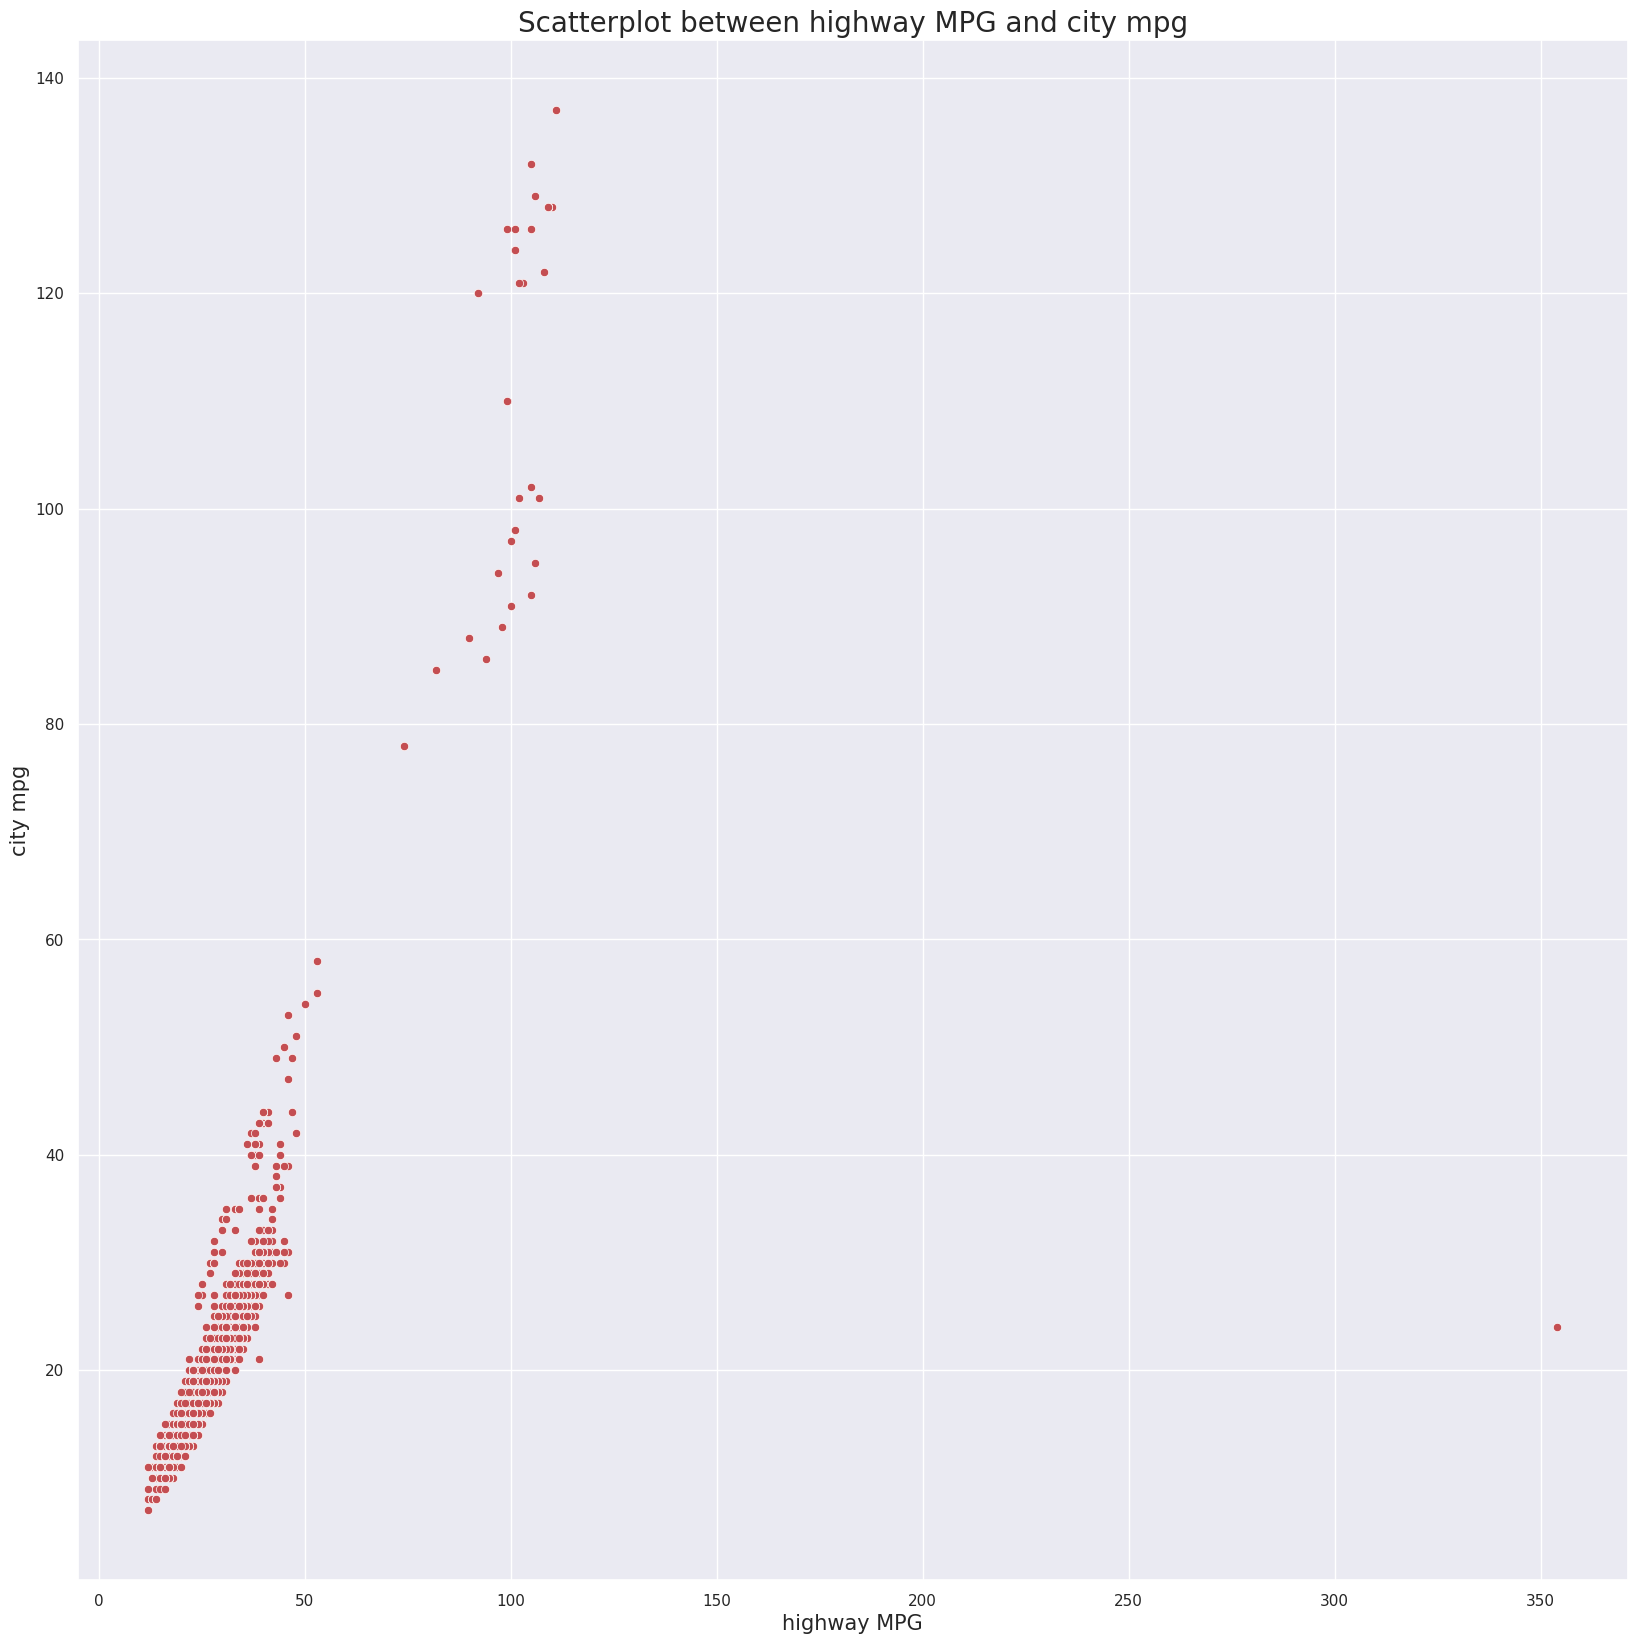

In [172]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg",fontsize="20")
plt.xlabel("highway MPG",fontsize="15")
plt.ylabel("city mpg",fontsize="15")
plt.show()

As expected majority of the cars have similar mileage in both city as well as highway except for one which has a highway mileage of above 350.

Removing the outlier in our data where the highway MPG is about 350 as it could affect the final obtained result.

In [203]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [204]:
data = data[data['highway MPG'] < 350]

We would now be using a scatterplot as the above but with removing the outliers. We see almost a linear line between the two features that we have considered and that is what is expected.

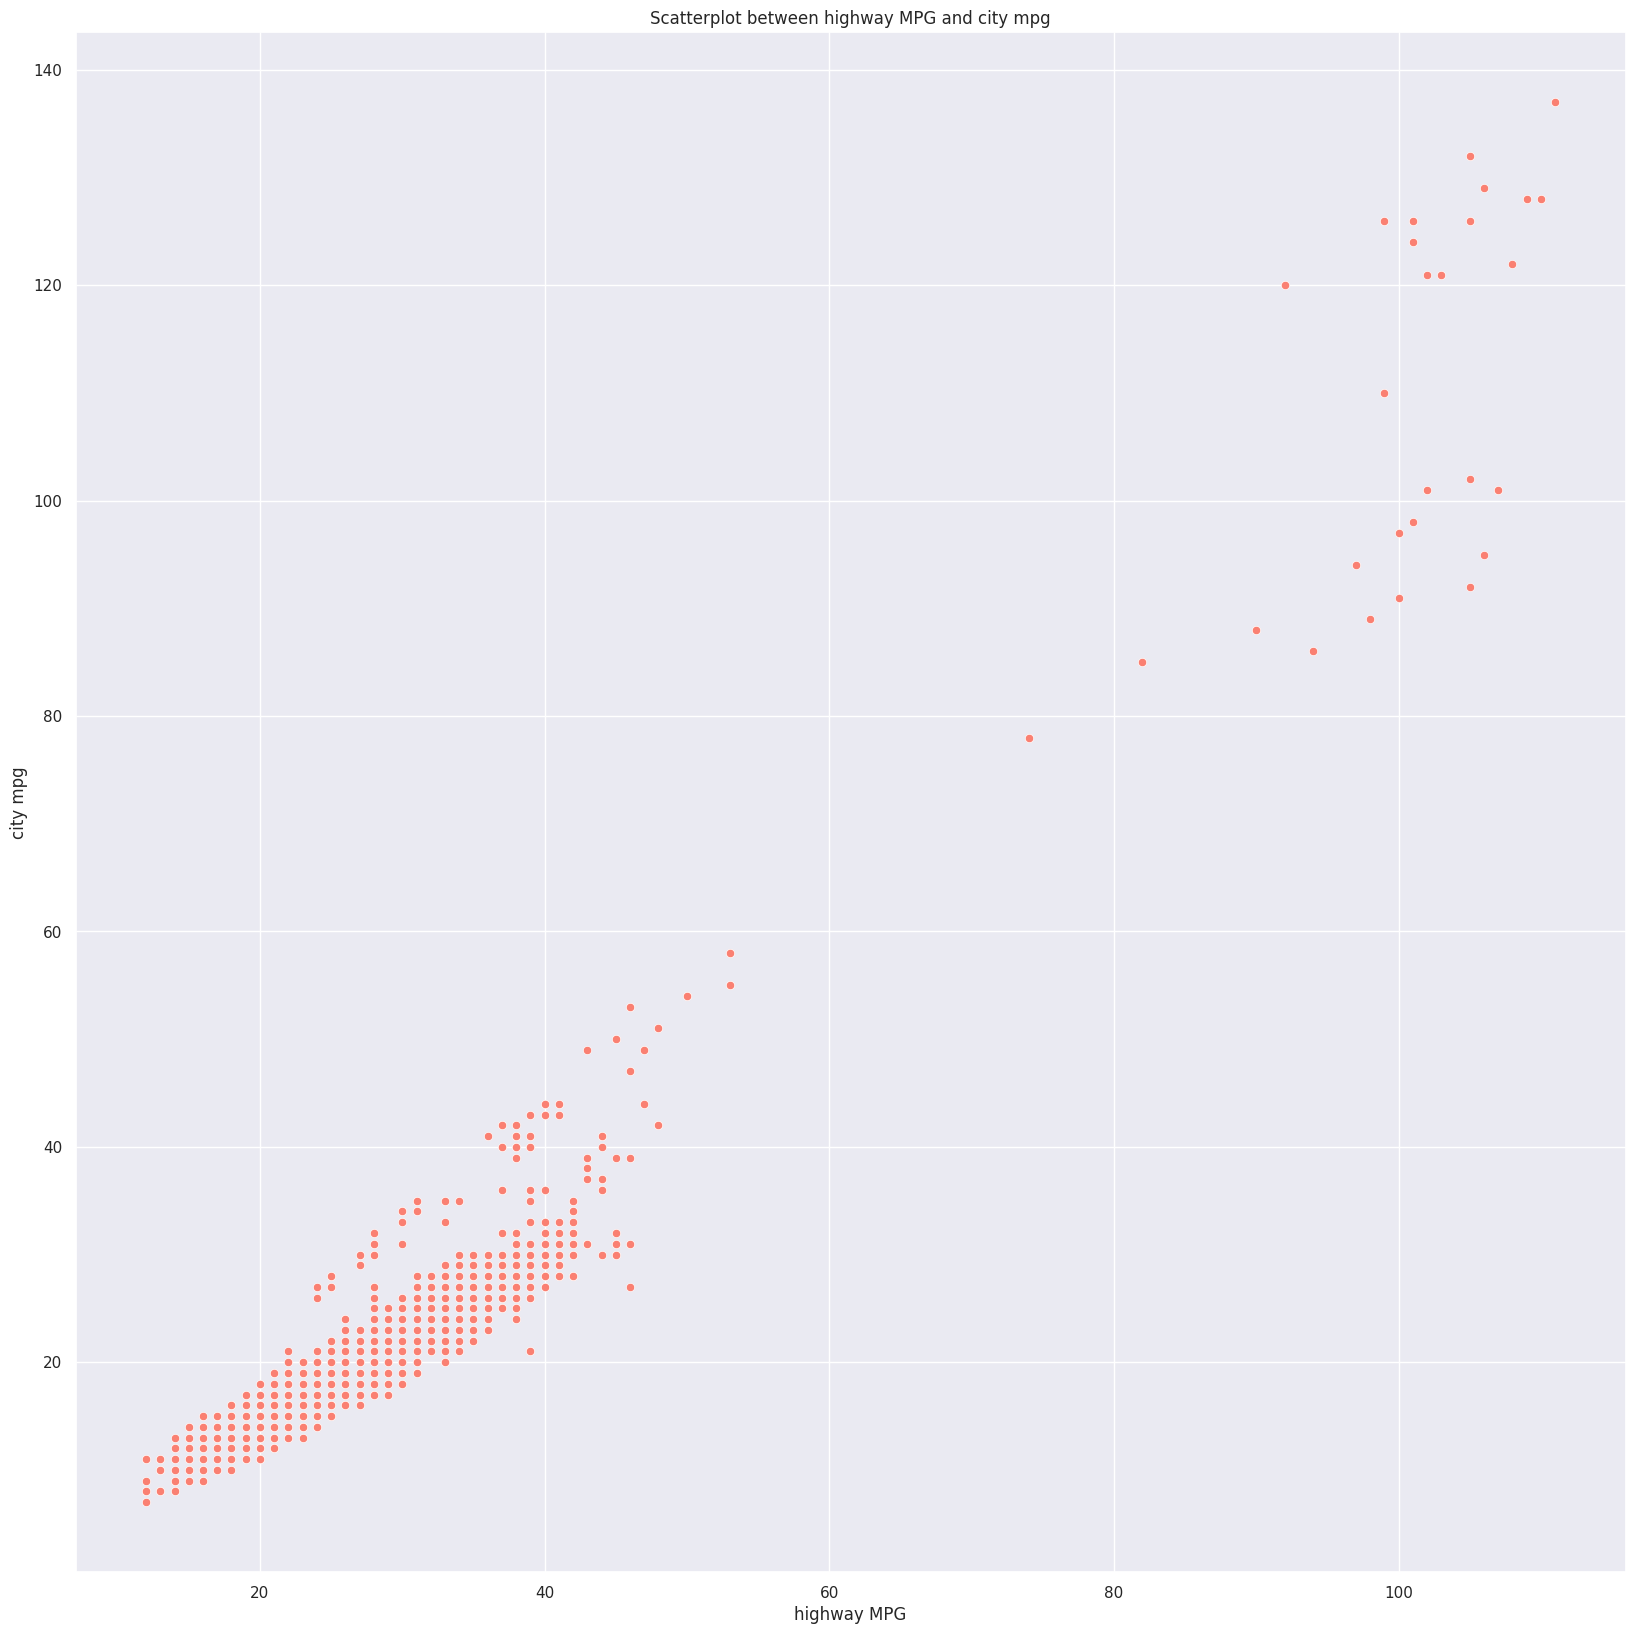

In [39]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [40]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

There are several unique market categories.

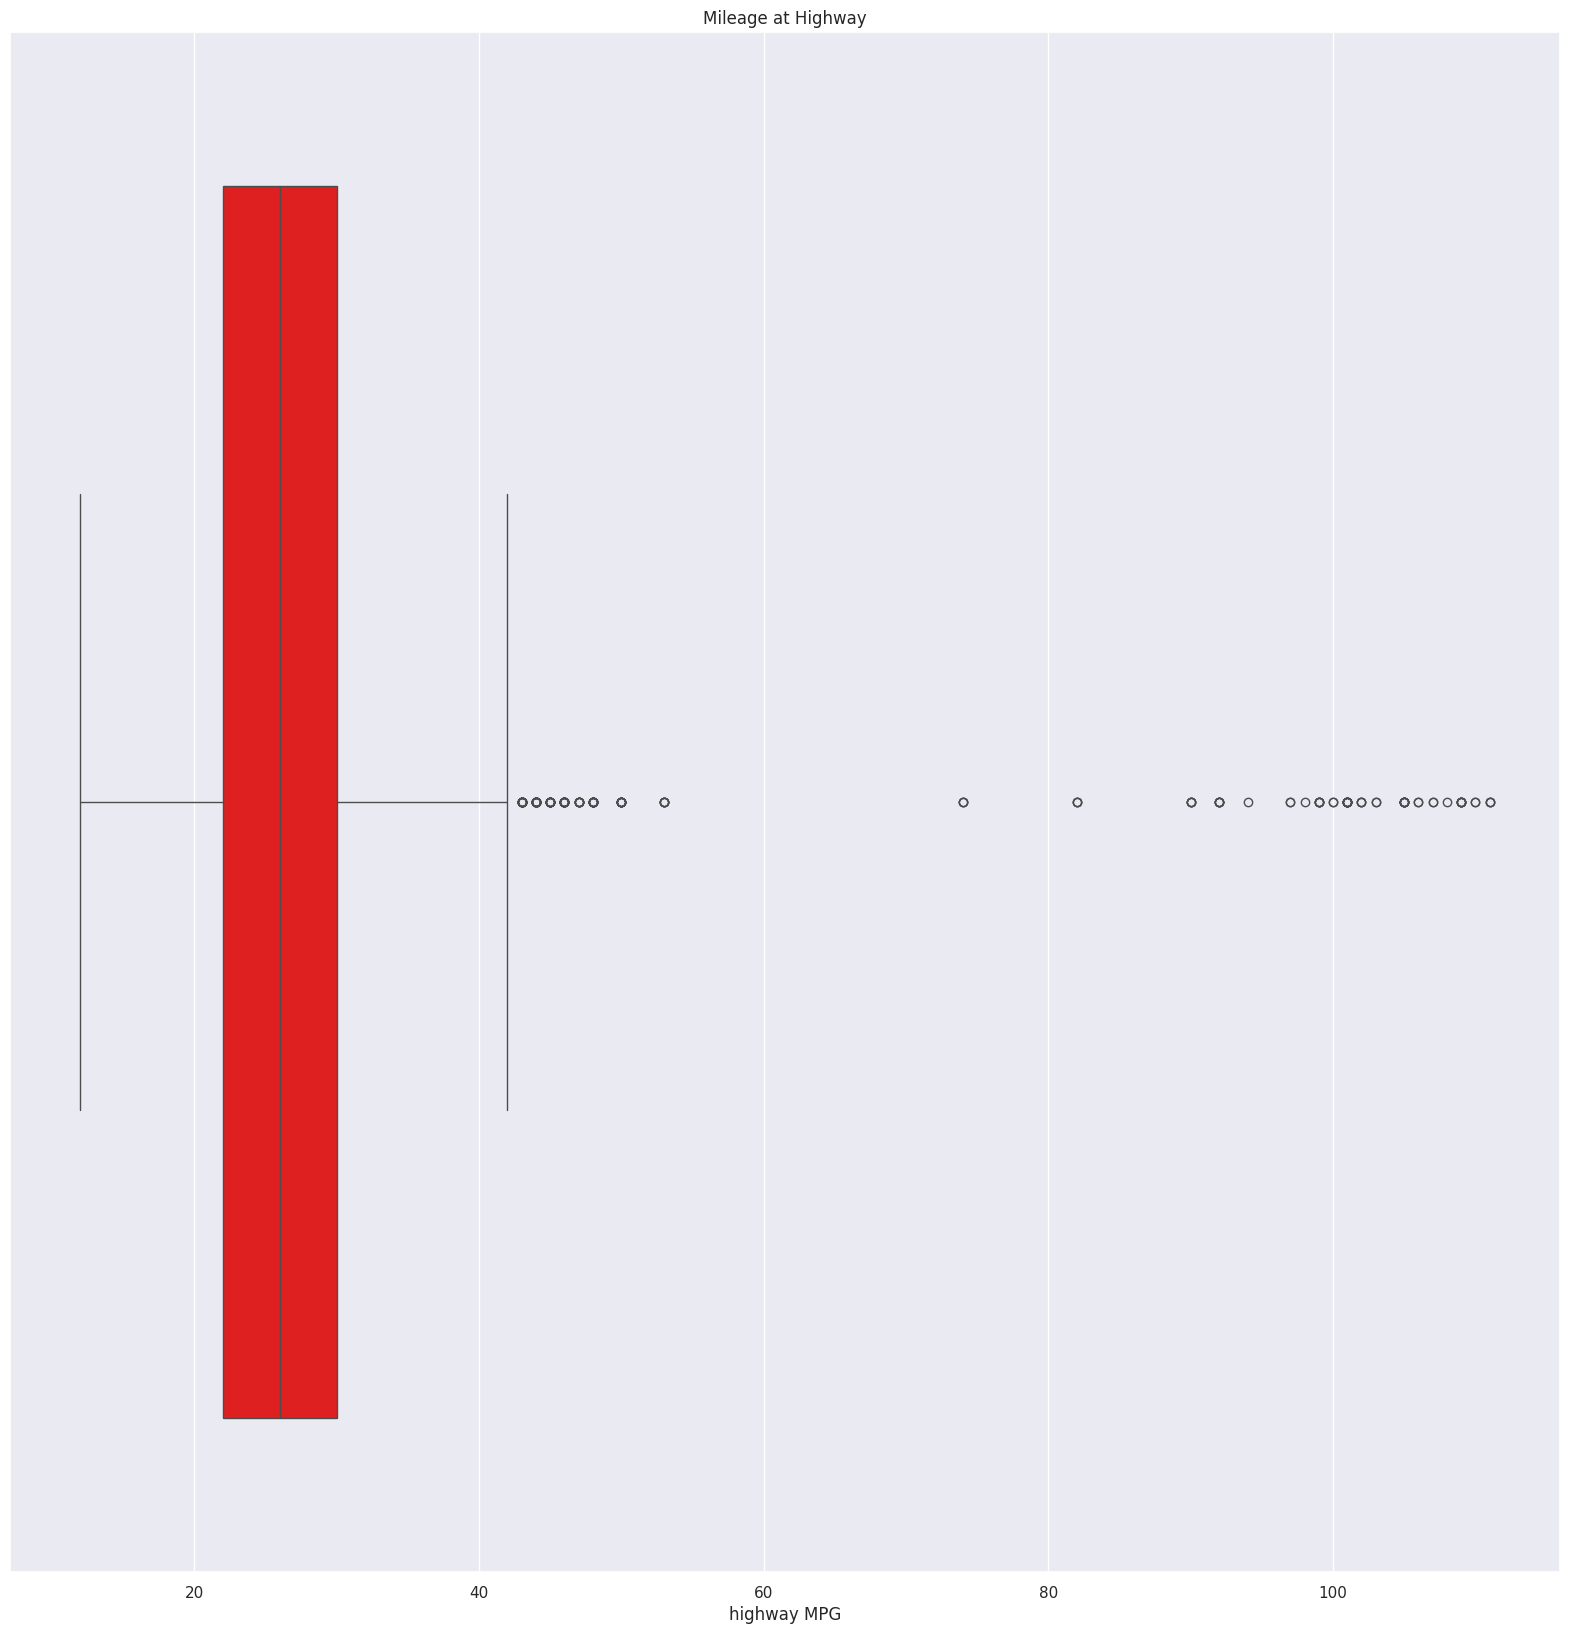

In [182]:
sns.boxplot(x = 'highway MPG', data = data, color = 'red')
plt.title("Mileage at Highway")
plt.show()

The majority of cars have a an average of around 35-30MPG.

From the above boxplot we would remove the outliers by setting outliers as greater than 60.

In [205]:
data = data[data['highway MPG'] < 60]

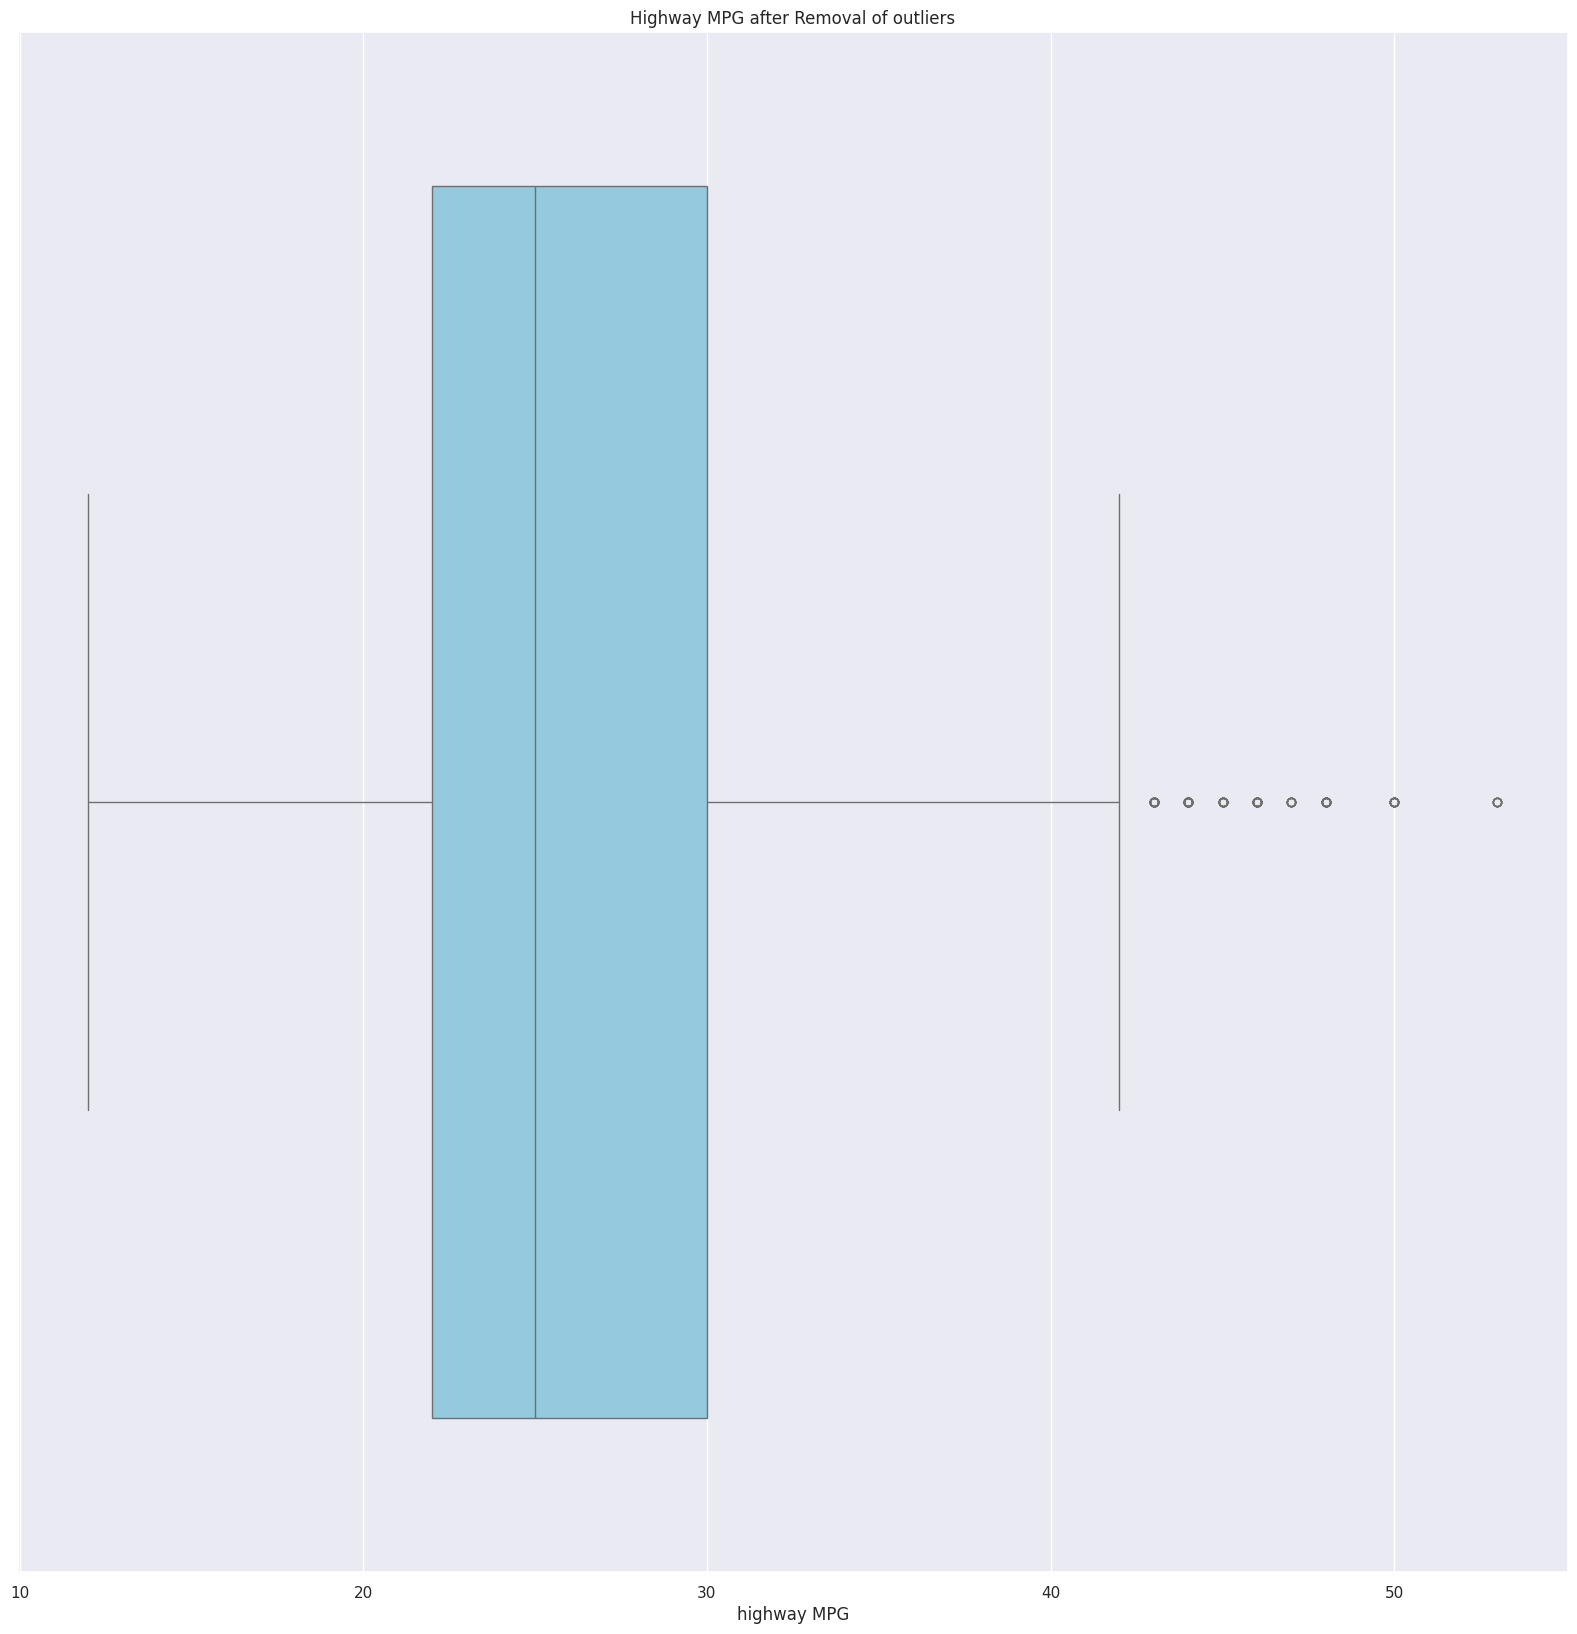

In [186]:
sns.boxplot(x = 'highway MPG', data = data, color = 'skyblue')
plt.title("Highway MPG after Removal of outliers")
plt.show()

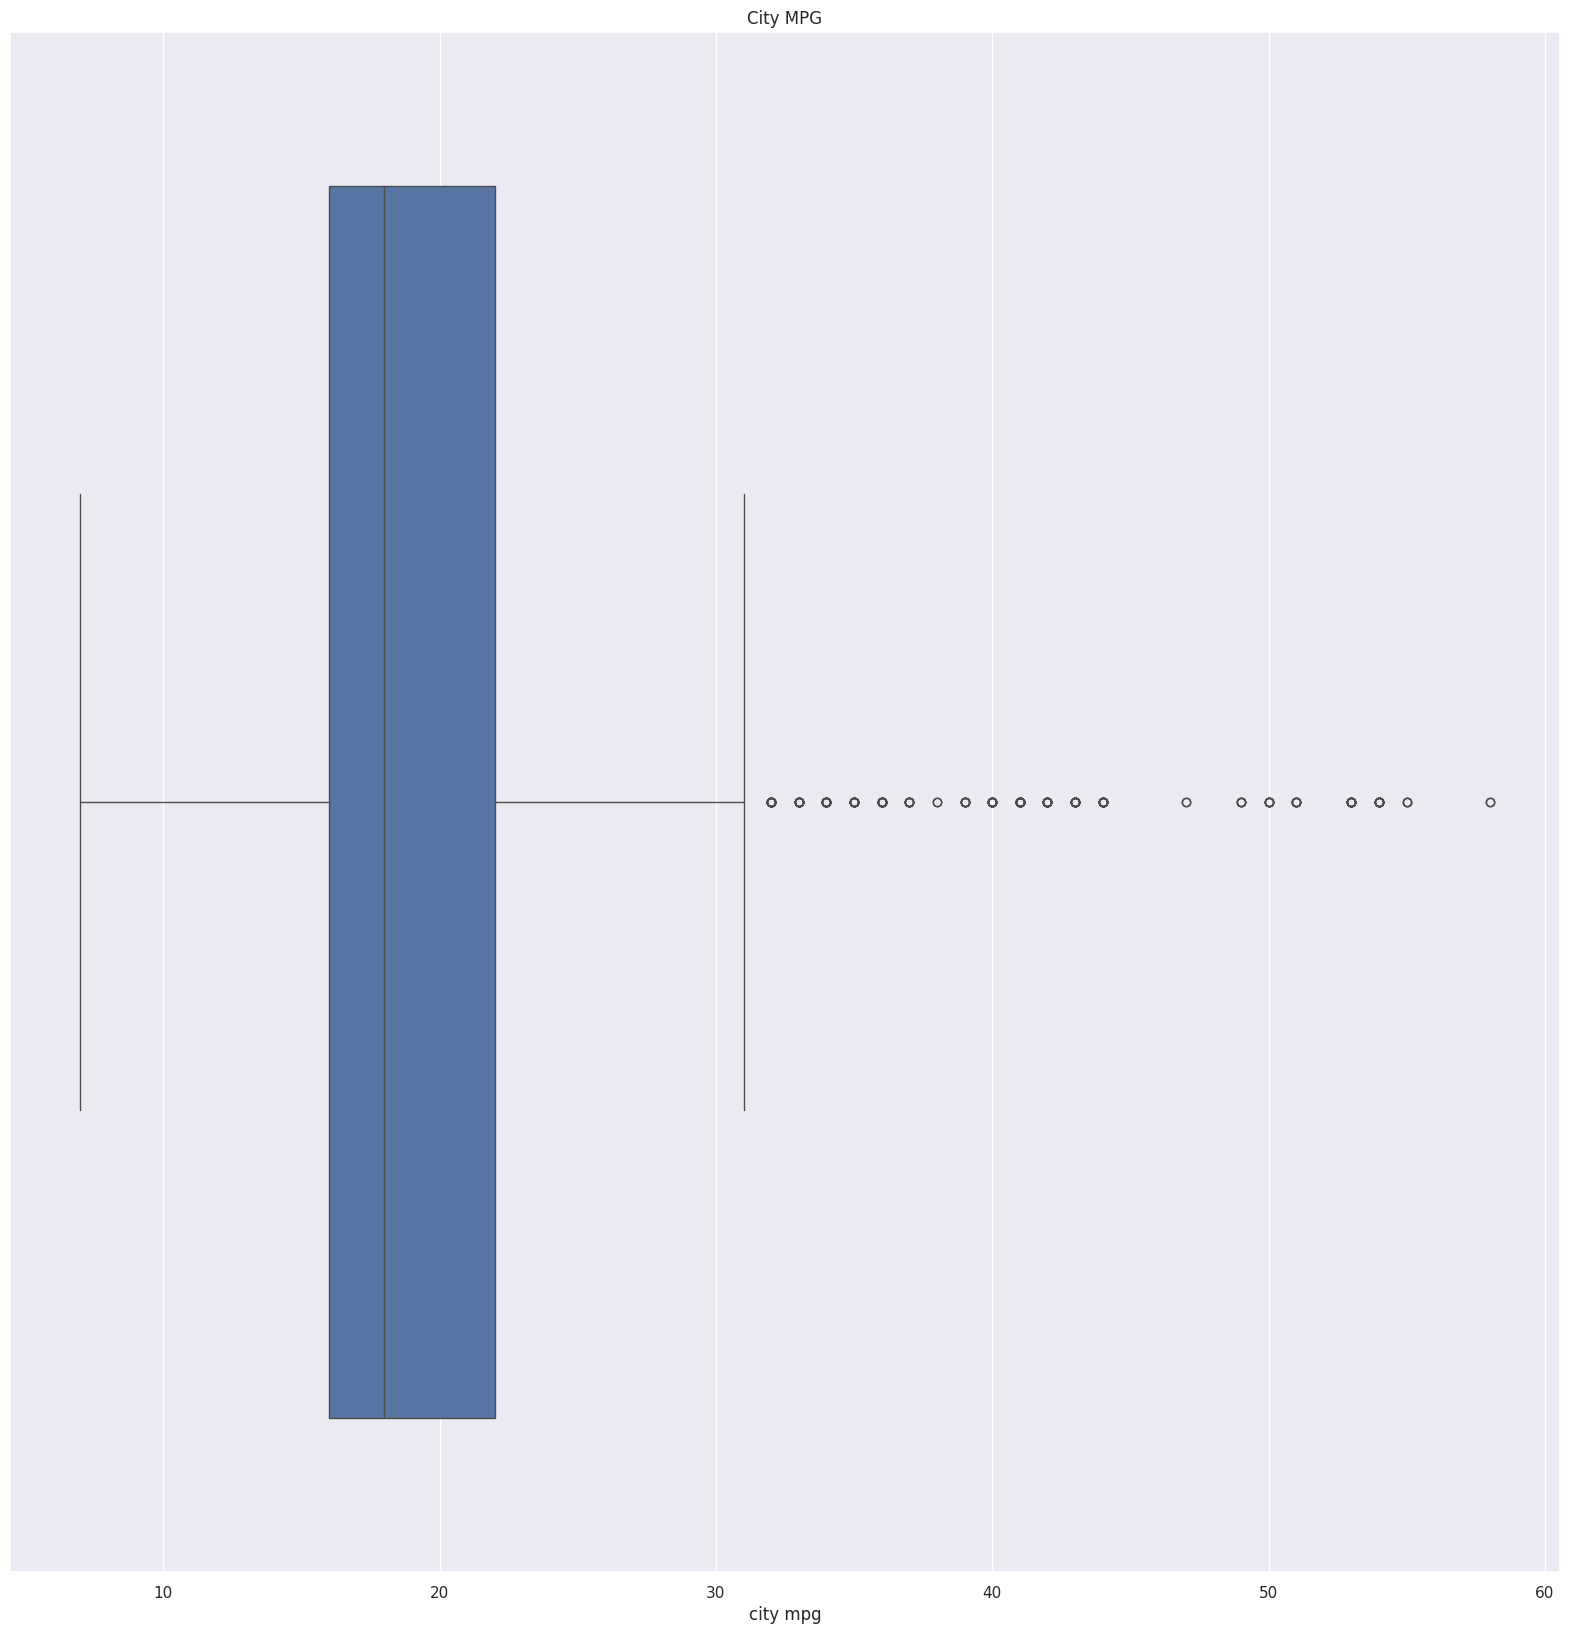

In [188]:
sns.boxplot(x = 'city mpg', data = data)
plt.title("City MPG")
plt.show()

From the above boxplot we can observe the city averae to be around 18-20 MPG  

Removing the outlier values and put the bar equal to 40 respectively.

In [206]:
data = data[data['city mpg'] < 40]

We would once again plot the boxplot of 'city mpg' respectively. We see again that the data is right skewed.

Text(0.5, 1.0, 'City Mileage(MPG) after Removing Outliers')

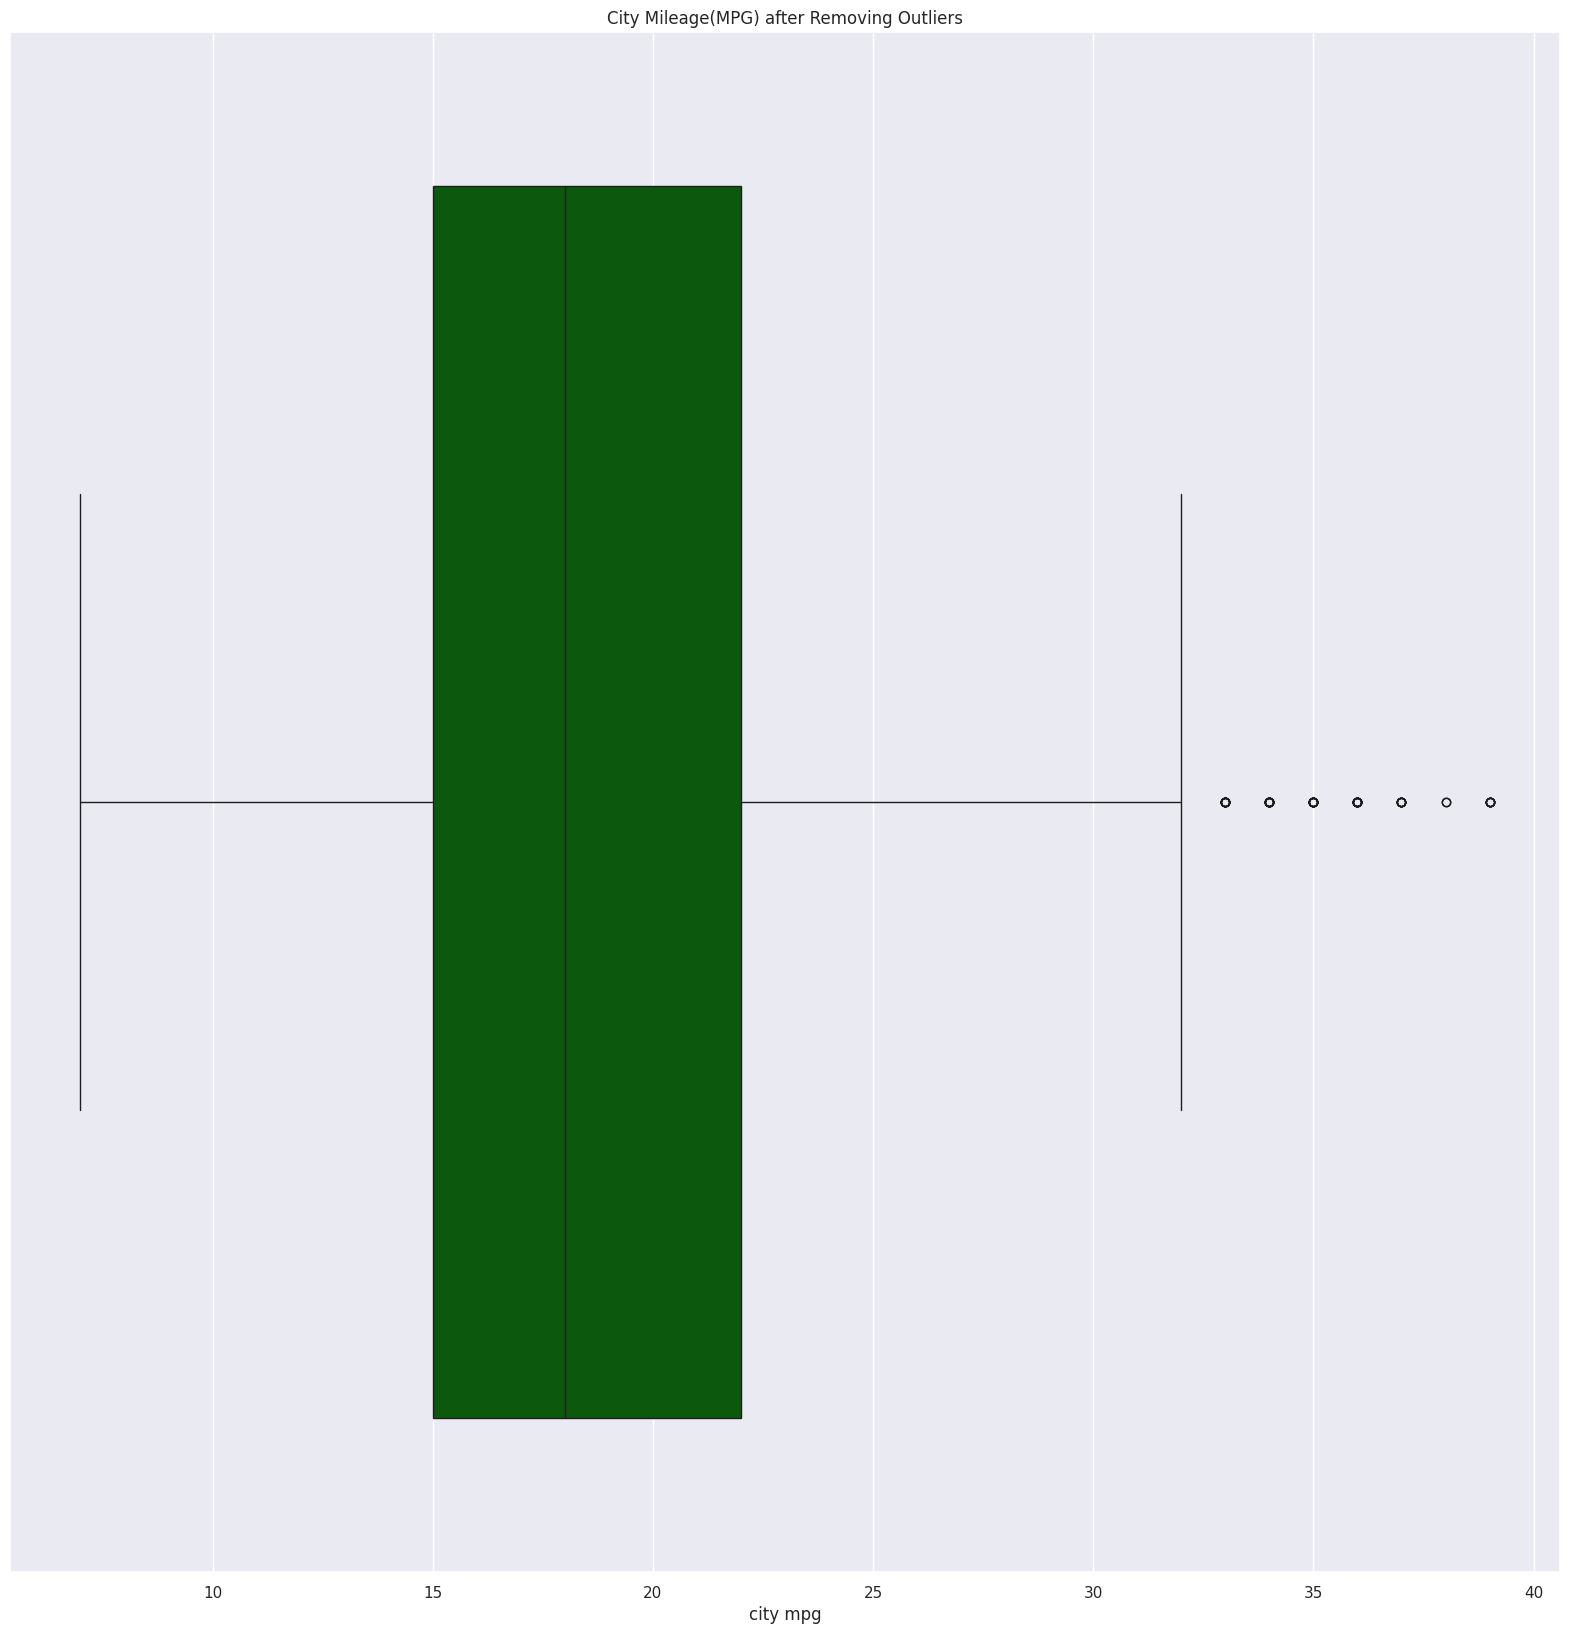

In [207]:
sns.boxplot(x = 'city mpg', data= data, color = 'darkgreen')
plt.title("City Mileage(MPG) after Removing Outliers")

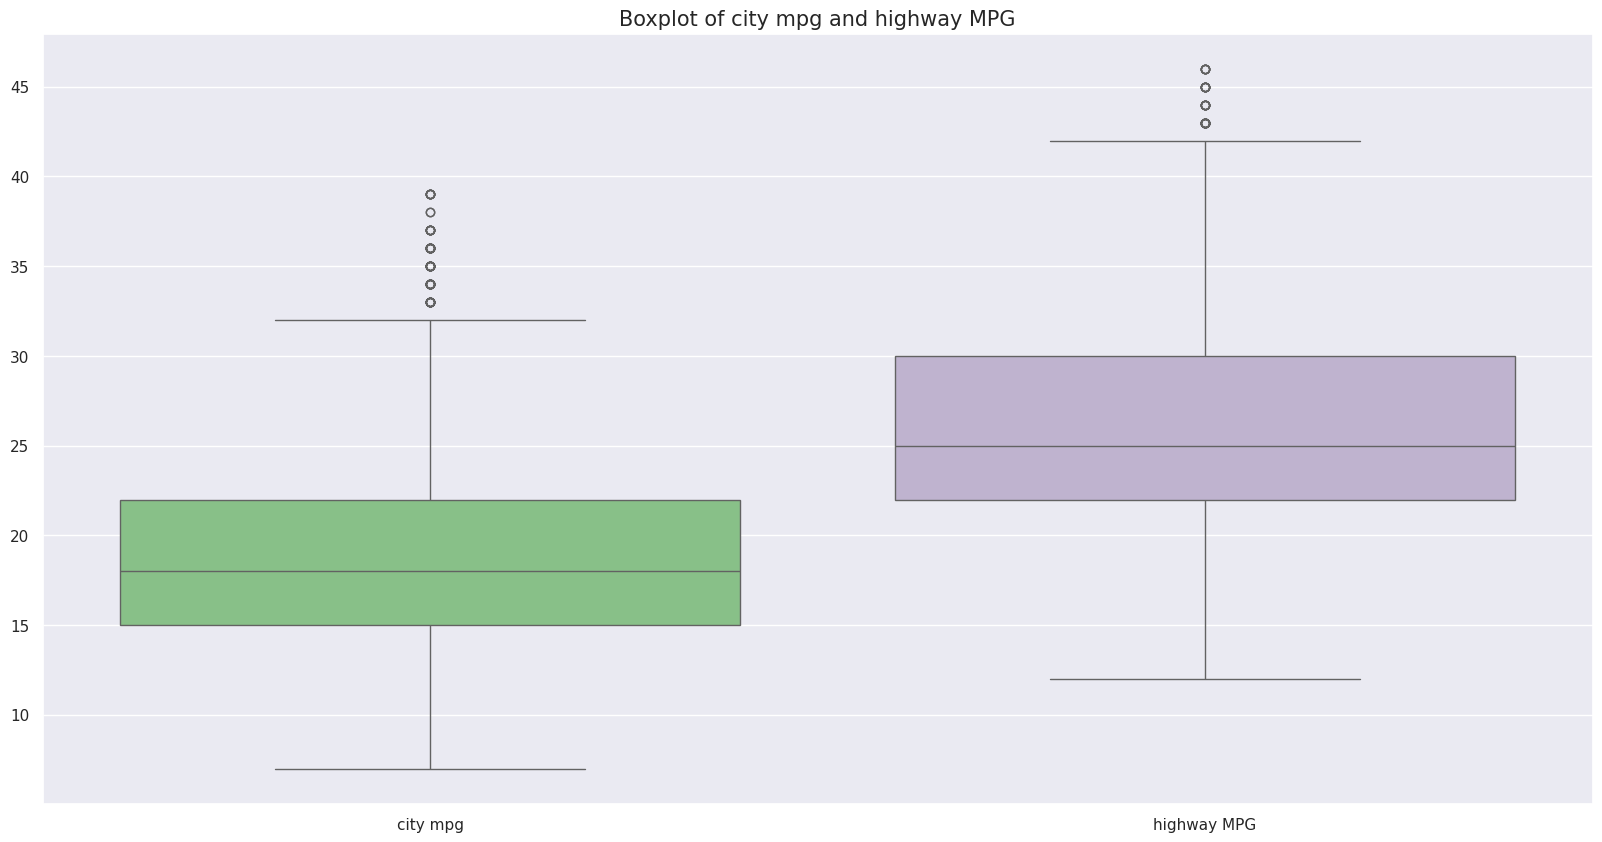

In [192]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

As expected the mileage in city is less than that at highways.

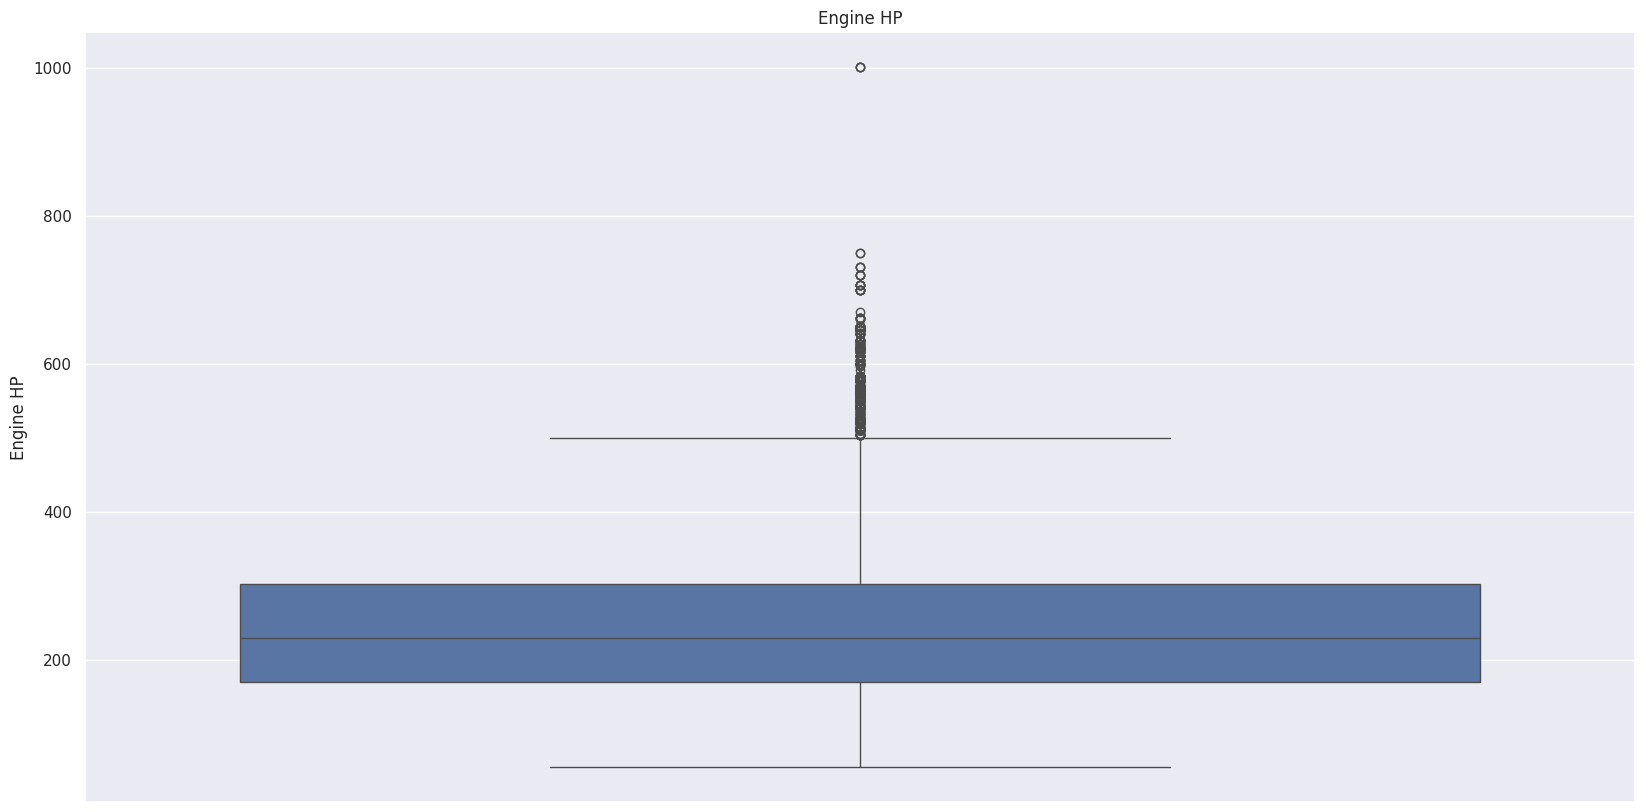

In [194]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['Engine HP'])
plt.title("Engine HP")
plt.show()

Majority of engines HP have a value of 200-300.

Removing the only outlier having a HP of around 1000

In [209]:
data = data[data['Engine HP'] < 800]

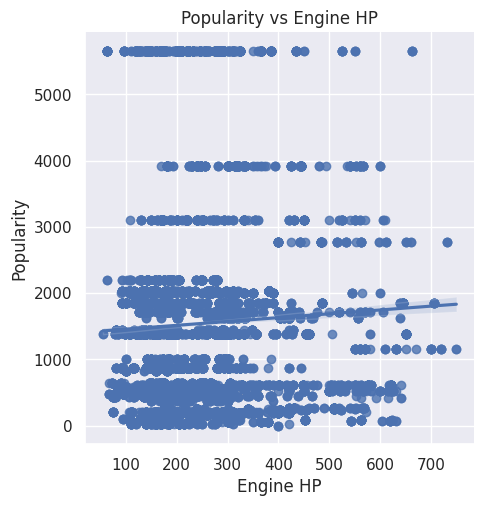

In [210]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)
plt.title("Popularity vs Engine HP")
plt.show()

We can conclude no clear observation between the Engine HP and the popularity.

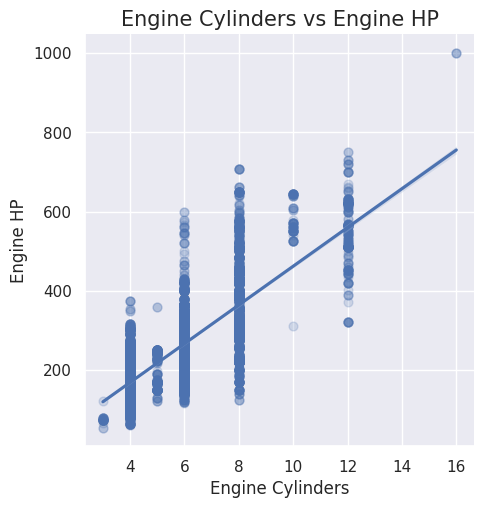

In [56]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

Increase in Engine cylenders also linearly increases the Engine HP.

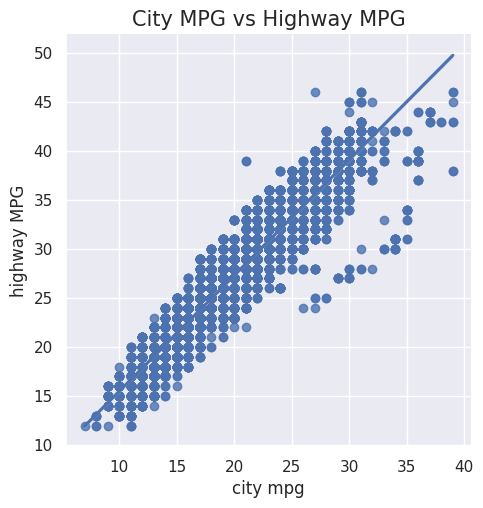

In [213]:
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)
plt.title("City MPG vs Highway MPG", fontsize = 15)
plt.show()

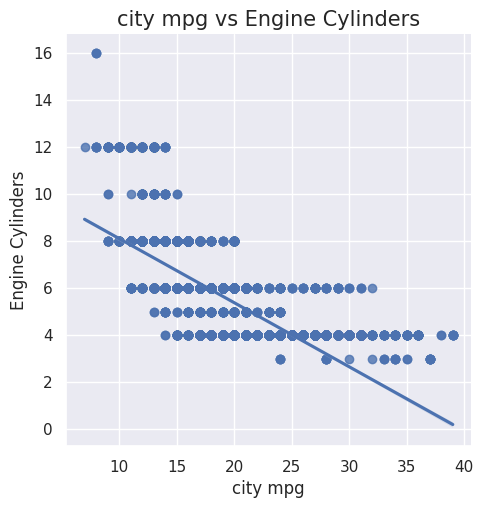

In [58]:
sns.lmplot(x = 'city mpg', y = 'Engine Cylinders', data = data)
plt.title("City MPG vs Engine Cylinders", fontsize = 15)
plt.show()

From the above graph we can observe that the mileage decreases as the number of Engine Cylenders increase.

<Axes: >

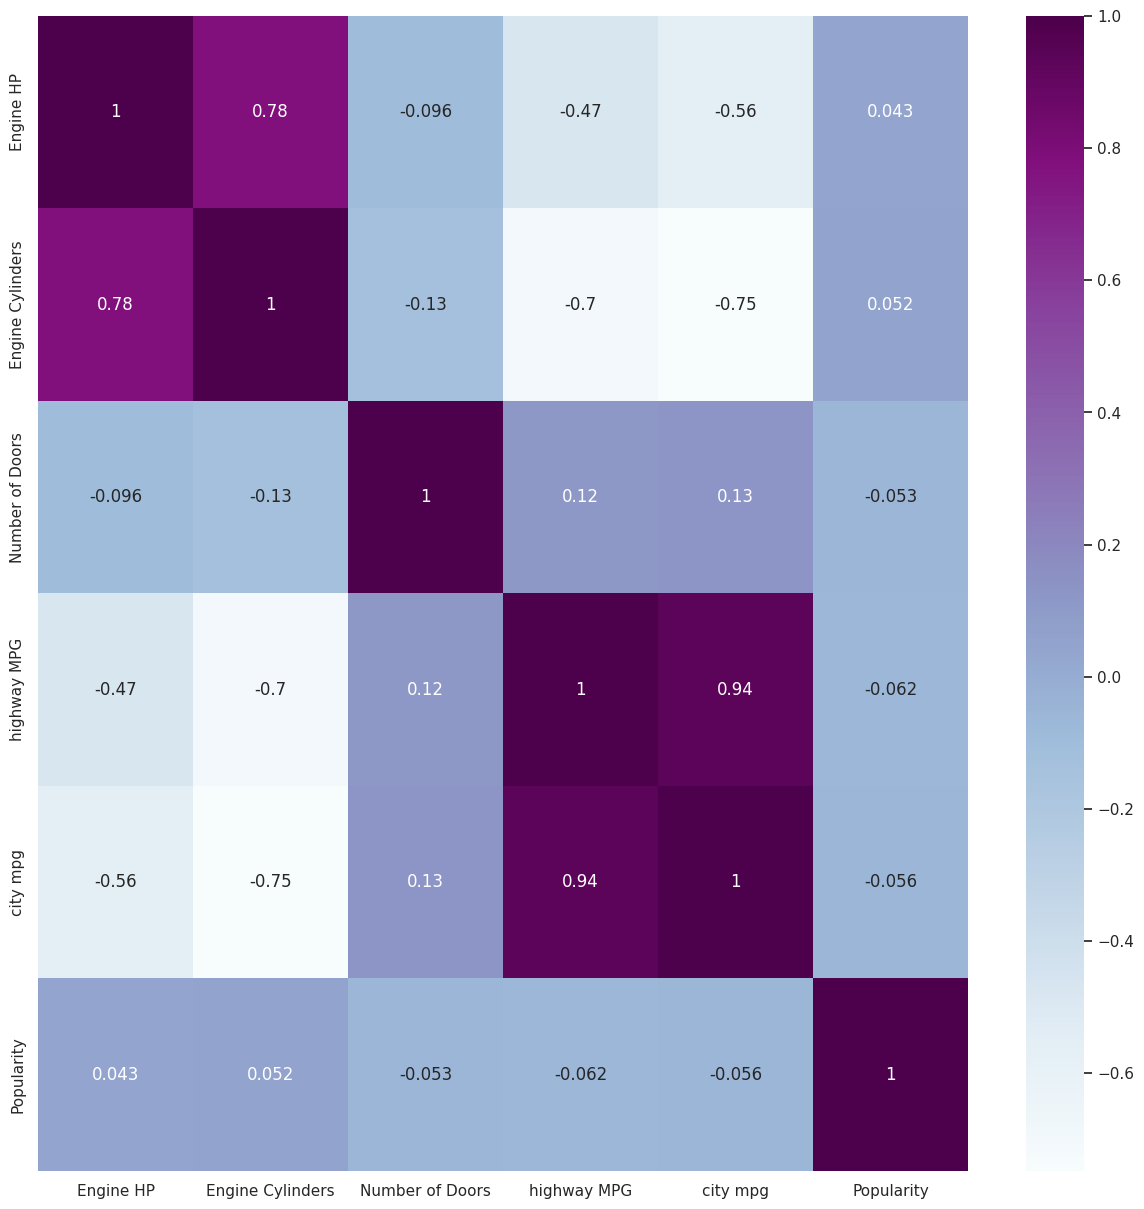

In [59]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

We see that 'highway MPG' and 'city mpg' are highly correlated. That is the reason that we got a value of about 0.94 respectively. In addition to this, we see that 'Engine Horsepower' and 'Engine Cylinders' are correlated which is true as having a higher number of cylinders would ensure that there is a high horsepower on a car.

In [215]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,0
Engine Cylinders,20
Transmission Type,0
Driven_Wheels,0
Number of Doors,1
Market Category,3731


Market Category has the highest number of missing values. Along with that Engine Cylenders, Engine Fuel Type and Number of doors also has missing values.

Replacing the only missing value with the median, even though removing wont have caused much of an effect.

In [216]:
data['Number of Doors'].median()

4.0

In [217]:
data['Number of Doors'].fillna(4.0, inplace = True)

In [218]:
data['Number of Doors'].isnull().sum()

np.int64(0)

## Creating a new column

Added a new feature which calculates the difference between the present year and the year of manufacture of the car so that we can take into consideration the depreciation amount which can be done by the machine learning models. Therefore, we create a new column called 'Present Year' and we make it equal to 2025 respectively. We would then subtract the 'Year of manufacture' values with these values of the car so that we get the total number of years the car has been out.

In [226]:
data['Present Year'] = 2025

We would be printing the head of the dataframe just to check the values that are present in it.

In [227]:
data.sample(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Of Manufacture,Present Year
427,BMW,4 Series,2015,premium unleaded (required),240.0,4.0,AUTOMATIC,all wheel drive,2.0,Luxury,Midsize,Convertible,33,21,3916,50750,10,2025
6739,Mercedes-Benz,Maybach,2016,premium unleaded (required),523.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Sedan,20,13,617,189350,9,2025
11070,Chevrolet,Uplander,2006,regular unleaded,201.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,23,16,1385,22750,19,2025
1034,Audi,A3,2016,premium unleaded (recommended),170.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Luxury,Compact,Convertible,35,24,3105,39300,9,2025
10962,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Extended Cab Pickup,18,13,2031,31660,10,2025
3787,Mitsubishi,Eclipse,2012,regular unleaded,162.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,28,20,436,20499,13,2025
139,BMW,3 Series,2015,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,30,20,3916,45750,10,2025
2663,Chevrolet,C/K 1500 Series,1998,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,NaN,Large,Regular Cab Pickup,19,14,1385,3282,27,2025
9716,Hyundai,Sonata Hybrid,2017,regular unleaded,193.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,43,38,1439,30100,8,2025
2266,GMC,Canyon,2012,regular unleaded,242.0,5.0,AUTOMATIC,four wheel drive,4.0,NaN,Compact,Crew Cab Pickup,21,16,549,31790,13,2025


Now it is the time to create a new column called 'Years of Manufacture' respectively. We would be doing the subtraction of the 'Present Year' from the 'Year' which is nothing but the year of manufacture. It would be better to plot the graph and see how the graph looks like in the notebook.

In [228]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']

In [229]:
#Removing the present year column as it is no longer needed
data.drop(['Present Year'], inplace = True, axis = 1)

In [231]:
data.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Of Manufacture
2088,Mercedes-Benz,C-Class,2017,premium unleaded (required),241.0,4.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,31,24,617,43675,8
3591,Land Rover,Discovery,2003,premium unleaded (required),217.0,8.0,AUTOMATIC,four wheel drive,4.0,Luxury,Midsize,4dr SUV,14,11,258,40350,22
5796,Acura,ILX Hybrid,2014,premium unleaded (recommended),111.0,4.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Hybrid",Compact,Sedan,38,39,204,28900,11
583,FIAT,500X,2016,regular unleaded,180.0,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,30,21,819,24635,9
10780,Chevrolet,Trax,2016,regular unleaded,138.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,34,26,1385,20300,9


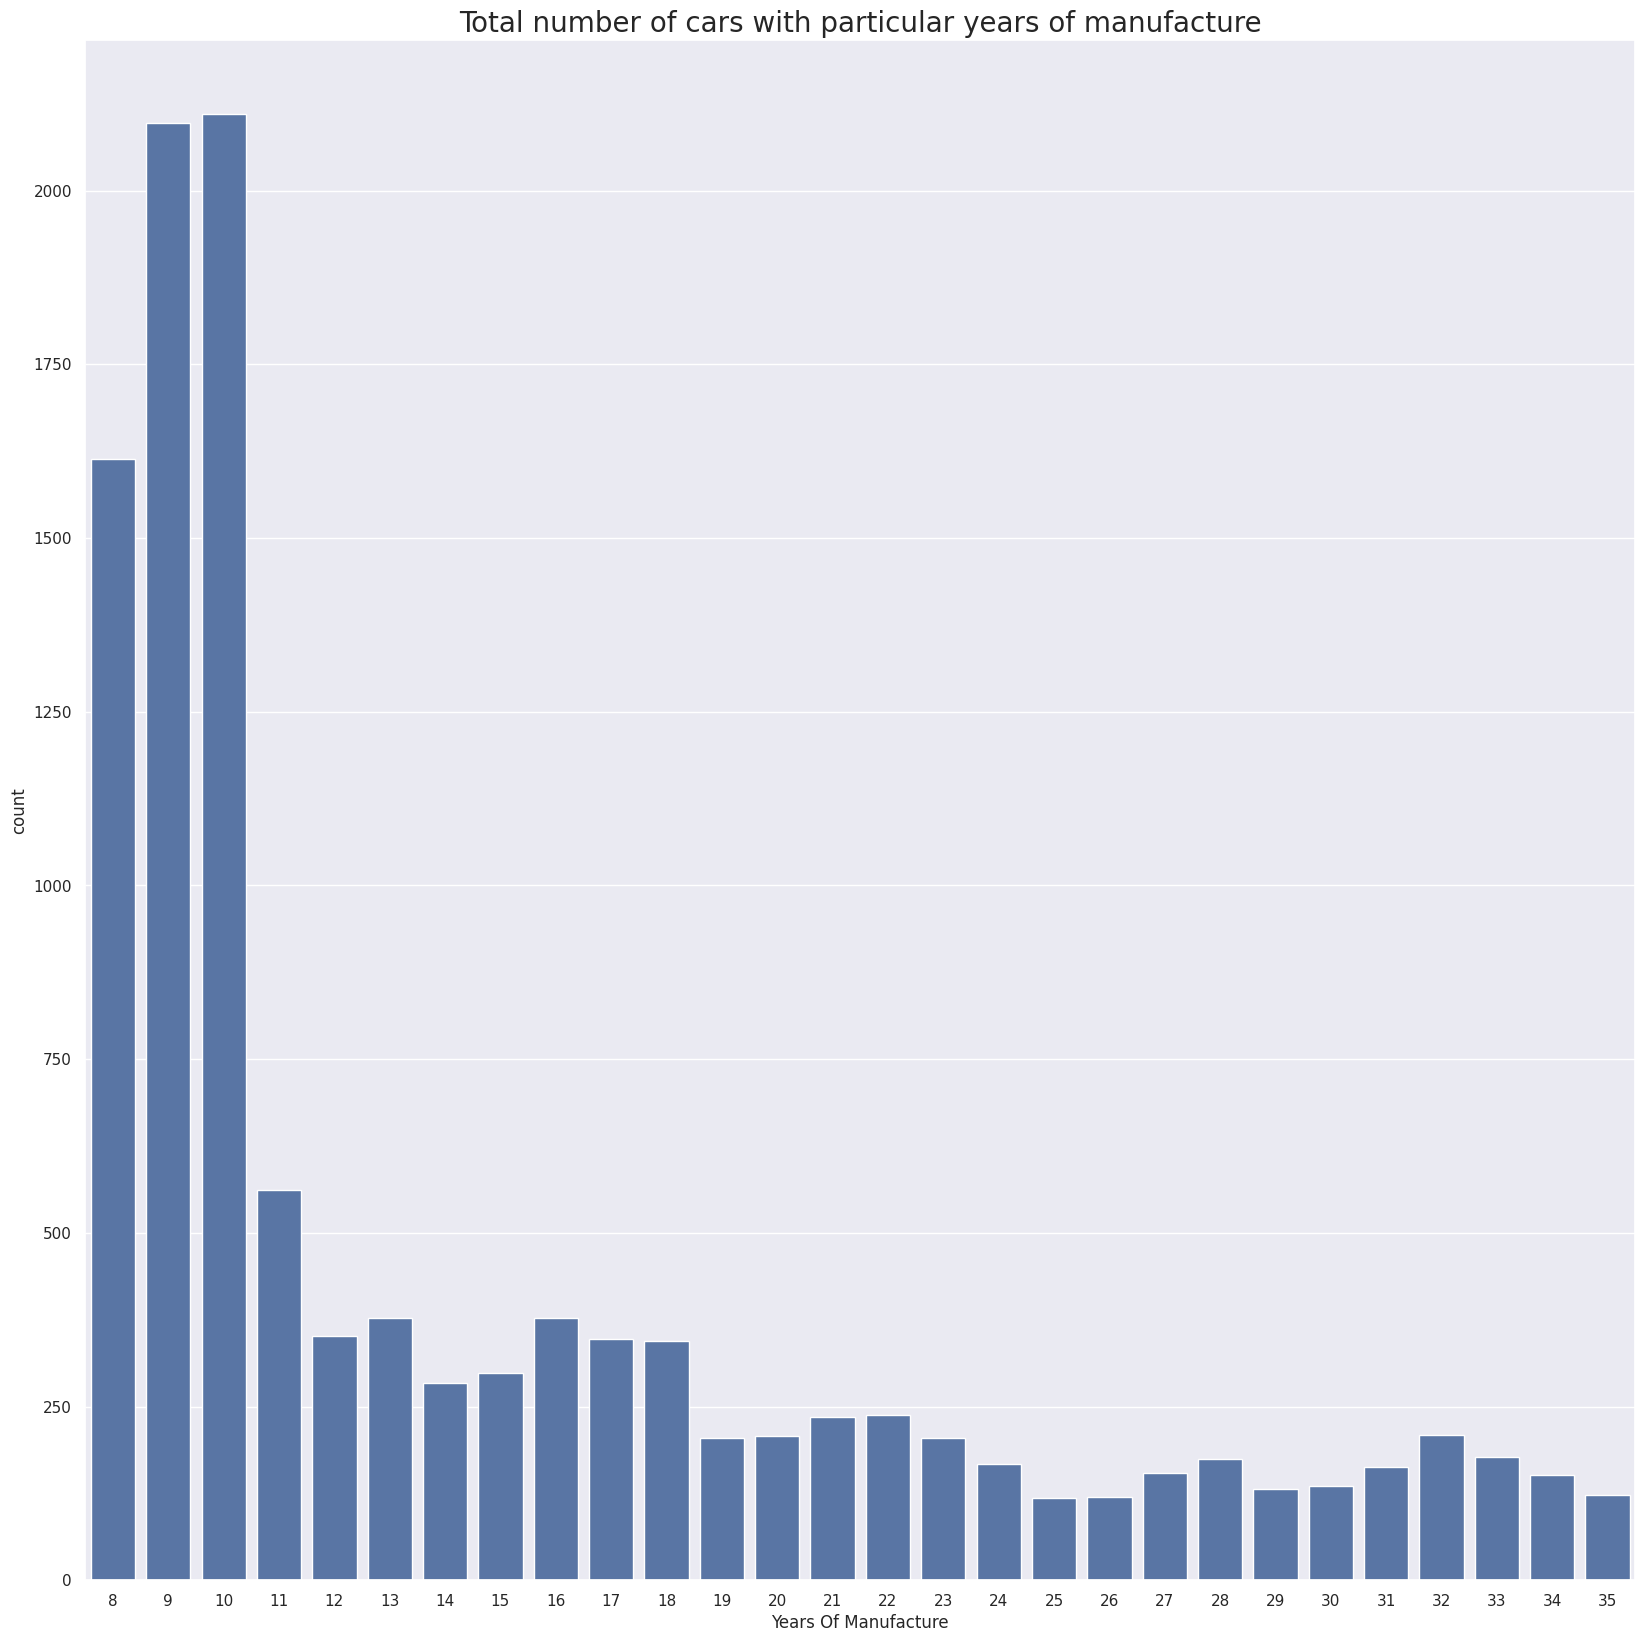

In [232]:
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize = 20)
plt.show()

Due to the dataset being old we can see that even the latest data is 8 years old but okay we will still try.

In [233]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)', nan],
      dtype=object)

In [234]:
type("data['Engine Fuel Type'].mode()")

str

In [235]:
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

In [236]:
data['Engine Fuel Type'].isnull().sum()

np.int64(0)

In [237]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,20
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,3731


It is good to know the values that are present in 'Engine Cylinders' and see if there is any replacement. We see that there is an 'nan' value present in our data. We have to remove that point and replace it with some other value as missing values in machine learning could be costly and lead to some errors. Moreover, some machine learning algorithms cannot perform well too if there are any missing values.

In [238]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan])

In [241]:
#replacing the nan values in Engine Cylenders column to 4
data['Engine Cylinders'].fillna(4, inplace = True)

In [240]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,3731


As around 3500 values are missing in out dataset about 'Market Category', thus removing this feature for further analysis is the only feasible option.

In [242]:
data.drop(['Market Category'], inplace = True, axis = 1)

In [243]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


Now no NULL values are present in our data

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11681 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11681 non-null  object 
 1   Model                 11681 non-null  object 
 2   Year                  11681 non-null  int64  
 3   Engine Fuel Type      11681 non-null  object 
 4   Engine HP             11681 non-null  float64
 5   Engine Cylinders      11681 non-null  float64
 6   Transmission Type     11681 non-null  object 
 7   Driven_Wheels         11681 non-null  object 
 8   Number of Doors       11681 non-null  float64
 9   Vehicle Size          11681 non-null  object 
 10  Vehicle Style         11681 non-null  object 
 11  highway MPG           11681 non-null  int64  
 12  city mpg              11681 non-null  int64  
 13  Popularity            11681 non-null  int64  
 14  MSRP                  11681 non-null  int64  
 15  Years Of Manufacture  11

In [88]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

There are vehicles of various types in our data

**Shuffling the data**

Shuffling the data randomly so that we get outputs differently and we would be dealing with data without any particular order or a particular timeframe.


In [245]:
shuffled_data = shuffle(data, random_state = 22)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

In [247]:
#Dividing the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [248]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (9344, 15)
The size of the output train data is: (9344,)
The size of the input test data is: (2337, 15)
The size of the output test data is: (2337,)


Therefore we have 9344 values in training data and 2337 in the test data

In [249]:
encoder = TargetEncoder(cols = 'Year')

In [251]:
X_train.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
3879,Hyundai,Elantra,2017,regular unleaded,147.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,38,29,1439,8
11830,Toyota,Yaris,2017,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,35,30,2031,8
2213,Toyota,Camry Solara,2006,regular unleaded,225.0,6.0,AUTOMATIC,front wheel drive,2.0,Midsize,Convertible,26,18,2031,19
5984,Lexus,IS 350,2014,premium unleaded (required),306.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Sedan,28,19,454,11
5422,Volkswagen,Golf R,2017,premium unleaded (recommended),292.0,4.0,MANUAL,all wheel drive,4.0,Compact,4dr Hatchback,31,22,873,8


We will do target encoding here where we would replace the values with the average values of the 'MSRP' (Manufacturers Suggested Retail Price) whenever we find a value associated with it. This would make it easier for the machine learning model as we are already giving the output values to it so that there is no need to encode further.

In [252]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )

TargetEncoder(cols=['Year'])

In [253]:
X_train['Year'] = encoder.transform(X_train['Year'])

In [254]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [256]:
X_train.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
4776,Ford,Focus RS,42656.277006,premium unleaded (recommended),350.0,4.0,MANUAL,all wheel drive,4.0,Compact,4dr Hatchback,25,19,5657,8
6473,Lexus,LS 400,3073.511180,regular unleaded,290.0,8.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Sedan,23,17,454,27
7567,Toyota,Pickup,2144.710356,regular unleaded,150.0,6.0,MANUAL,four wheel drive,2.0,Compact,Extended Cab Pickup,17,14,2031,32
5566,Lexus,GS 300,37570.006597,premium unleaded (required),220.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Sedan,23,16,454,21
10404,Hyundai,Tiburon,45569.351254,regular unleaded,172.0,6.0,AUTOMATIC,front wheel drive,2.0,Compact,2dr Hatchback,24,17,1439,17


We would be doing the same set of steps for other models and we would be taking those values into consideration from our data set.

In [257]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])


In [259]:
X_train.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
10800,Mazda,30868.552770,48138.352941,regular unleaded,171.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,25,19,586,16
10026,Cadillac,43475.061640,49701.378254,regular unleaded,302.0,6.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,27,18,1624,15
11672,Suzuki,32476.297921,37792.409856,regular unleaded,185.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,21,16,481,20
8223,Dodge,22093.818024,2076.114030,regular unleaded,170.0,8.0,AUTOMATIC,rear wheel drive,2.0,Midsize,2dr SUV,12,11,1851,34
9214,Toyota,37790.046094,47961.207769,regular unleaded,266.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Passenger Minivan,25,18,2031,10


In [260]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [261]:
X_train["Engine Fuel Type"].unique()

array(['regular unleaded', 'premium unleaded (recommended)',
       'flex-fuel (unleaded/E85)', 'premium unleaded (required)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'flex-fuel (premium unleaded required/E85)',
       "data['Engine Fuel Type'].mode()", 'natural gas'], dtype=object)

In [262]:
X_train.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
7352,21487.760472,30531.150612,47961.207769,regular unleaded,148.0,4.0,AUTOMATIC,four wheel drive,4.0,Compact,4dr SUV,30,24,436,10
3861,24871.772910,30555.228221,47961.207769,regular unleaded,173.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,34,24,1439,10
8332,27279.575221,25794.297504,48138.352941,regular unleaded,207.0,6.0,MANUAL,four wheel drive,2.0,Compact,Extended Cab Pickup,19,15,5657,16
11305,24871.772910,37845.198144,54729.396721,regular unleaded,260.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,22,17,1439,13
10485,35156.347055,40463.445366,63903.228381,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,29,20,204,11


**One Hot Encoding**

 One hot encoding is a technique where each category in a feature is converted into a feature and set to 1 once the particular value is present in the data.

In [263]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

Concatenate the features with the X_train and X_test and remove the actual categorical features.

In [264]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [265]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

Checking the data and see if the values present in the data are only float and int values rather than objects.

In [266]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9344 entries, 4793 to 8059
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  9344 non-null   float64
 1   Model                 9344 non-null   float64
 2   Year                  9344 non-null   float64
 3   Engine HP             9344 non-null   float64
 4   Engine Cylinders      9344 non-null   float64
 5   Number of Doors       9344 non-null   float64
 6   highway MPG           9344 non-null   int64  
 7   city mpg              9344 non-null   int64  
 8   Popularity            9344 non-null   int64  
 9   Years Of Manufacture  9344 non-null   int64  
 10  Engine Fuel Type_1    9344 non-null   int64  
 11  Engine Fuel Type_2    9344 non-null   int64  
 12  Engine Fuel Type_3    9344 non-null   int64  
 13  Engine Fuel Type_4    9344 non-null   int64  
 14  Engine Fuel Type_5    9344 non-null   int64  
 15  Engine Fuel Type_6    9

**Standardization and Normalization of data**

Using standardization and normalisation for getting better results during training of model.


In [267]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [268]:
X_train_new.shape

(9344, 46)

In [269]:
# Creating empty list to store values and compare at last
error_mean_square = []
error_mean_absolute = []

# **Machine Learning Analysis**

**Linear Regression**



In [270]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

Here, we would be using predict to predict the test set values and store those values in y_predict which would later be used for comparison.

In [271]:
y_predict = model.predict(X_test_new)

In [272]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [273]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [279]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

Below, we can see the concatenated output and see the output

In [282]:
results.sample(5)

,Predicted Output,MSRP
95,4494.294848,18780
1141,13431.151212,24099
1427,13342.732806,29330
1961,92350.463130,73905
1819,6331.510008,2000


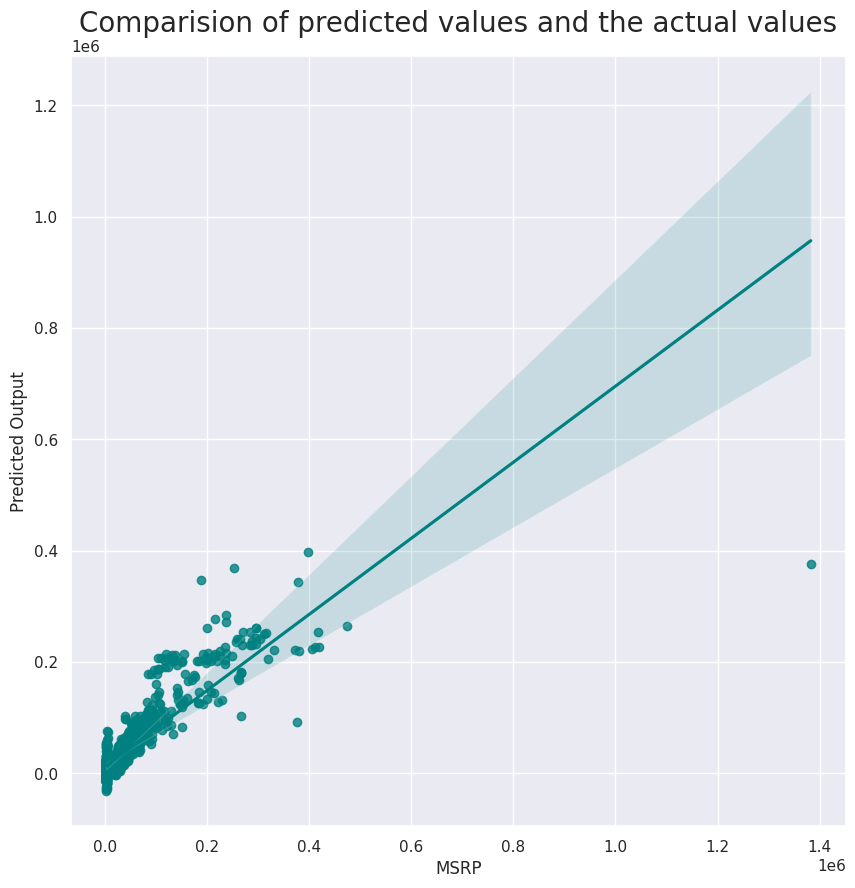

In [281]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

From the above seaborn's regplot, we can see that the predictions were very close to the actual values that we have considered. Therefore, linear regression did a good job in giving the regression values and can be used for predictions in the future.

**Support Vector Regressor**



In [283]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [285]:
results.sample(5)

,Predicted Output,MSRP
1154,30059.453537,2000
770,29896.772501,35725
1770,29893.157252,34495
1829,30454.509915,32760
1230,29764.601604,21120


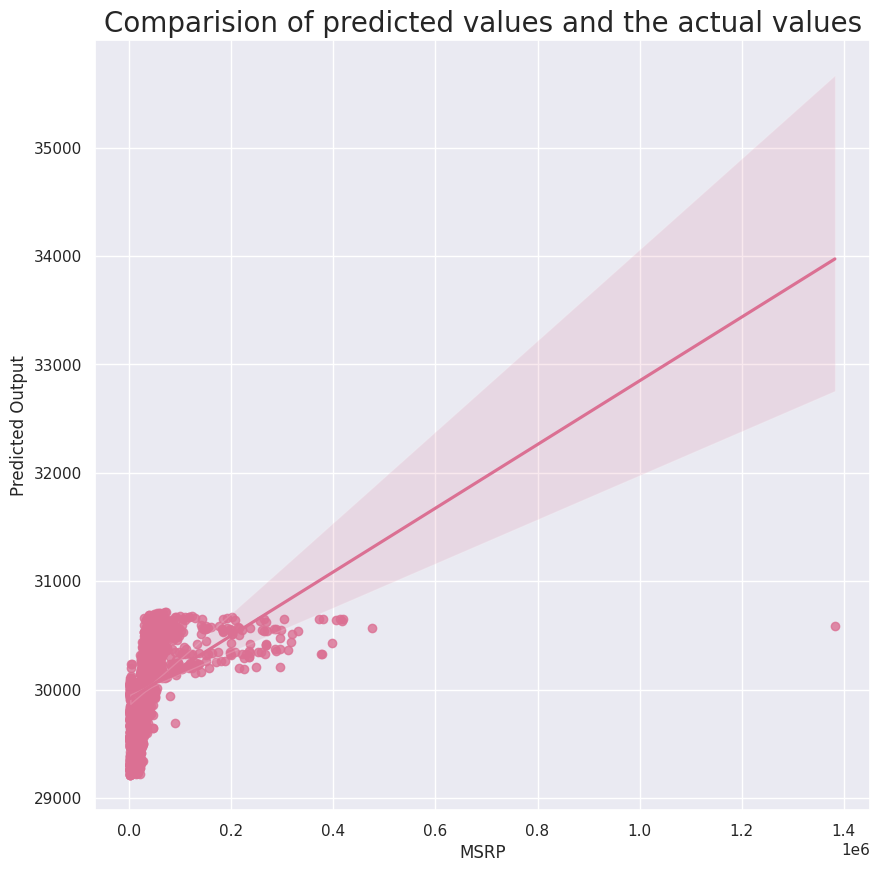

In [286]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'palevioletred', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

Here we can see that although the sample results for SVM were better than linear regression but the above plot shows that SVM cannot be used as the predictions were way too far from the actual output.

In [287]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

**K - Neighbors Regressor**



In [288]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [290]:
results.sample(5)

,Predicted Output,MSRP
450,67395.0,65225
636,23757.5,22300
1498,196900.0,215800
1545,13215.0,24195
224,36282.5,31335


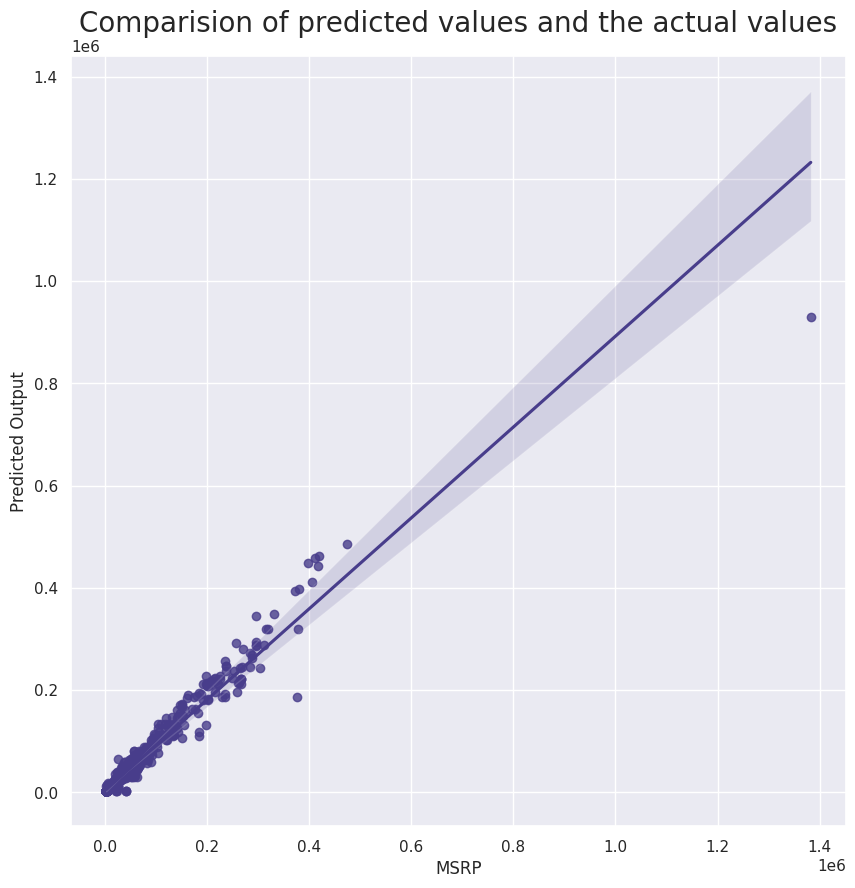

In [289]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

Here we see that K - Neighbors Regressor did well in both the result sample that we saw and also in the plot as most of the predictions are close to the actual outputs.

In [291]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

**PLS(Partial least squares) Regression**

In [292]:
model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [293]:
results.sample(5)

,Predicted Output,MSRP
1660,11587.770134,28650
1949,75600.220965,59200
1779,125449.244303,182009
620,29896.970169,31790
1058,63589.721076,54070


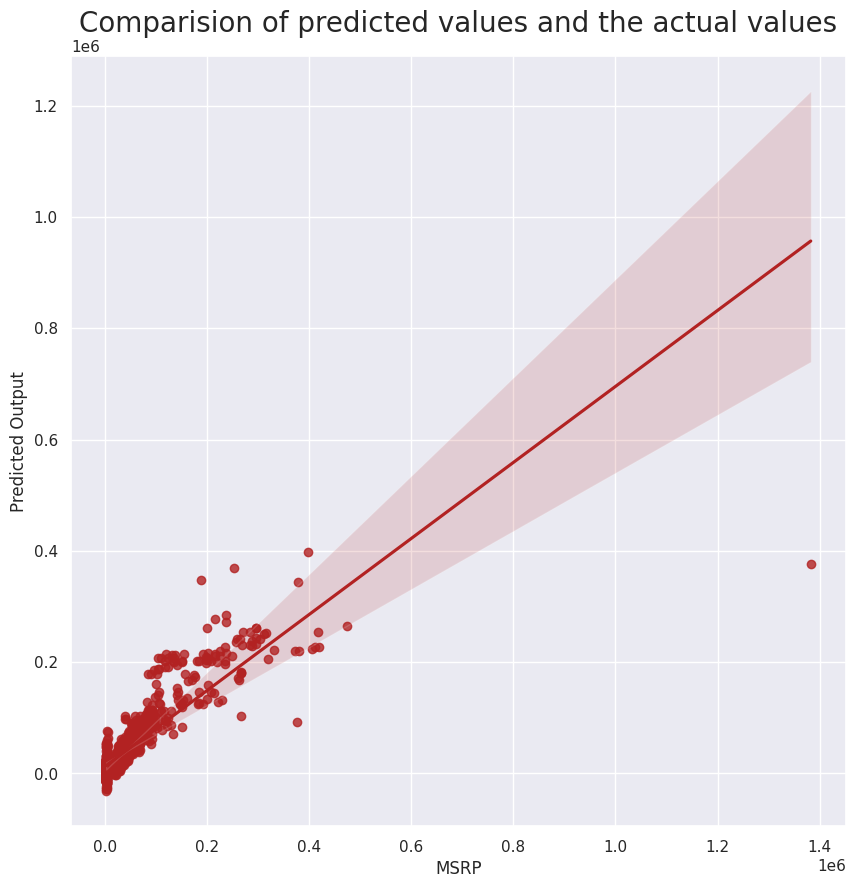

In [294]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

PLS regression scatterplot is good when compared to Support Vector Regressor, but KNN was better

In [295]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

**Decision Tree Regressor**



In [296]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [297]:
results.sample(5)

,Predicted Output,MSRP
358,28731.666667,30565
1860,26003.000000,23995
972,57703.333333,66025
1058,53470.000000,54070
2190,34002.500000,32030


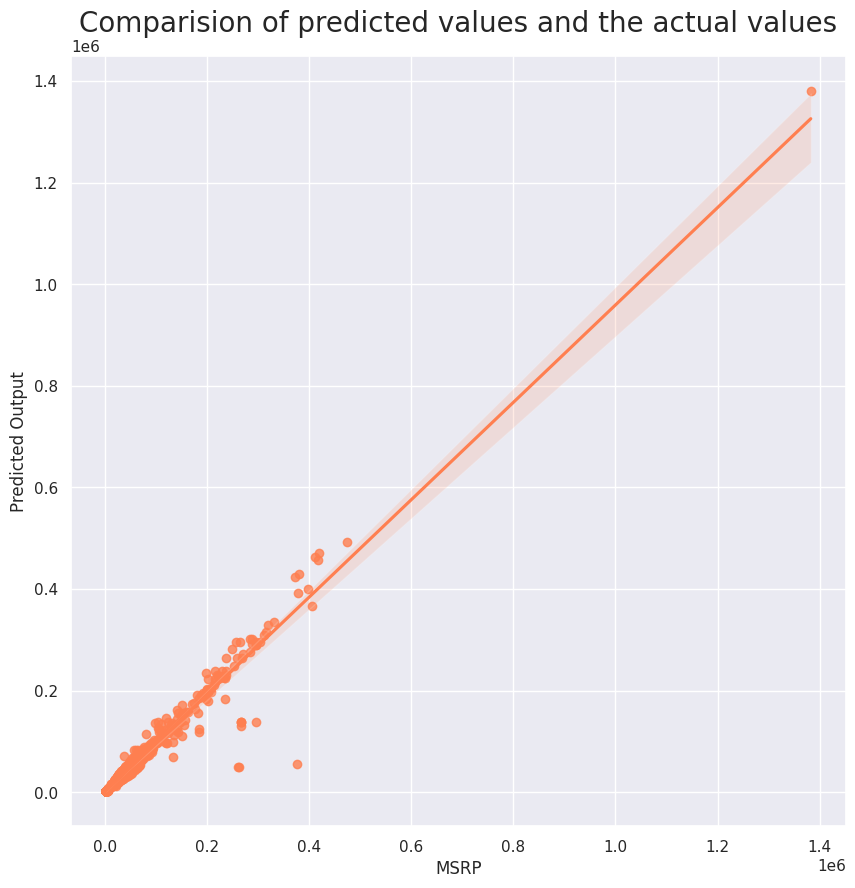

In [298]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We see that decision tree regressor does a great job of predicting the right outputs for the test inputs and is as good as KNN or even better

In [299]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

**Gradient Boosting Regressor**



In [300]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [301]:
results.sample(5)

,Predicted Output,MSRP
2269,23821.813424,29627
1168,30337.561616,31170
1150,23506.449801,25185
298,39116.617523,39950
1111,22255.144191,27600


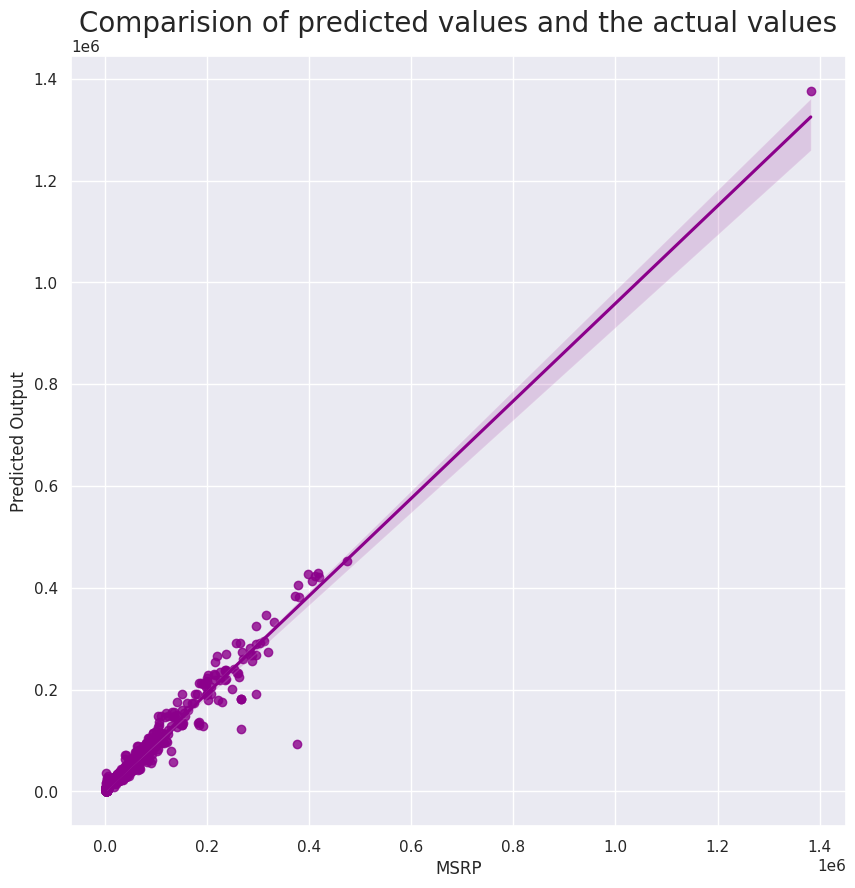

In [302]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

The gradient boosting regressor also did a good job in getting the most accurate predictions. There could be a few outliers in the predictions but they are few in number and this also be considered as a good model for predictions.

In [303]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

**MLP (Multilayer Perceptron)  Regressor**


In [304]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

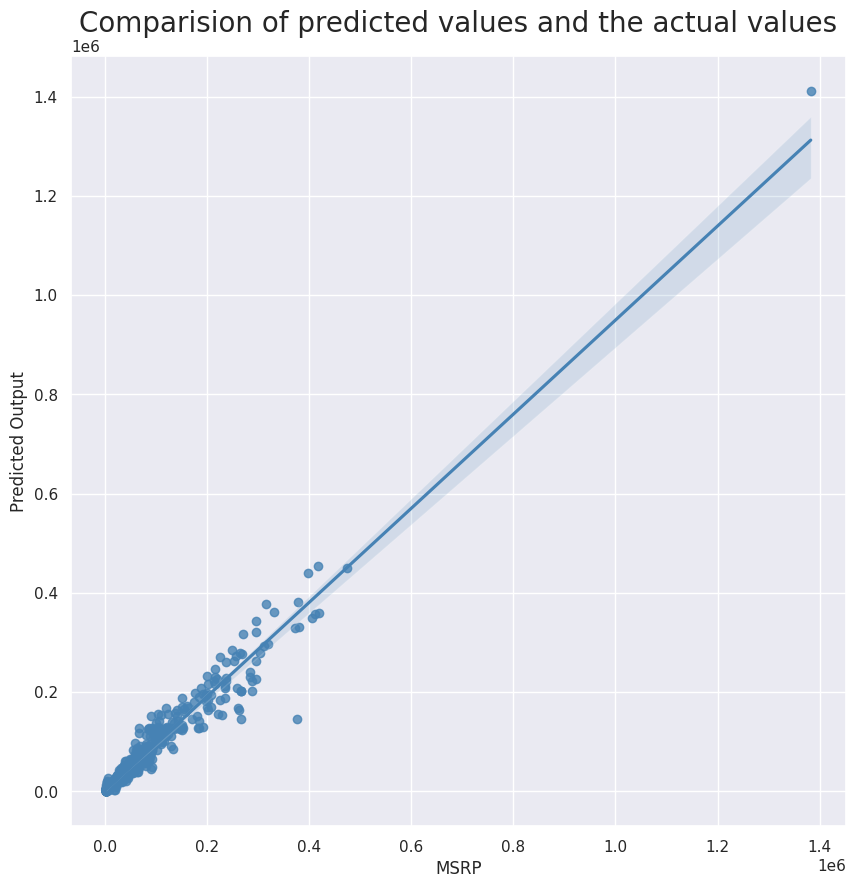

In [305]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'steelblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

This model also does a very fine job in predicting the outputs with only a few number of outliers.

In [306]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

# **Evaluation of Machine Learning Models**


In [307]:
data = {'Models': ['Linear Regression', 'Support Vector Regressor', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'MLP Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)

In [308]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,11097,848478753
1,Support Vector Regressor,22365,3094033507
2,K Nearest Regressor,4158,161007901
3,PLS Regression,11098,848525341
4,Decision Tree Regressor,3690,158031001
5,Gradient Boosting Regressor,4640,111142392
6,MLP Regressor,5271,131288147


**Barplot of machine learning models with mean absolute error**


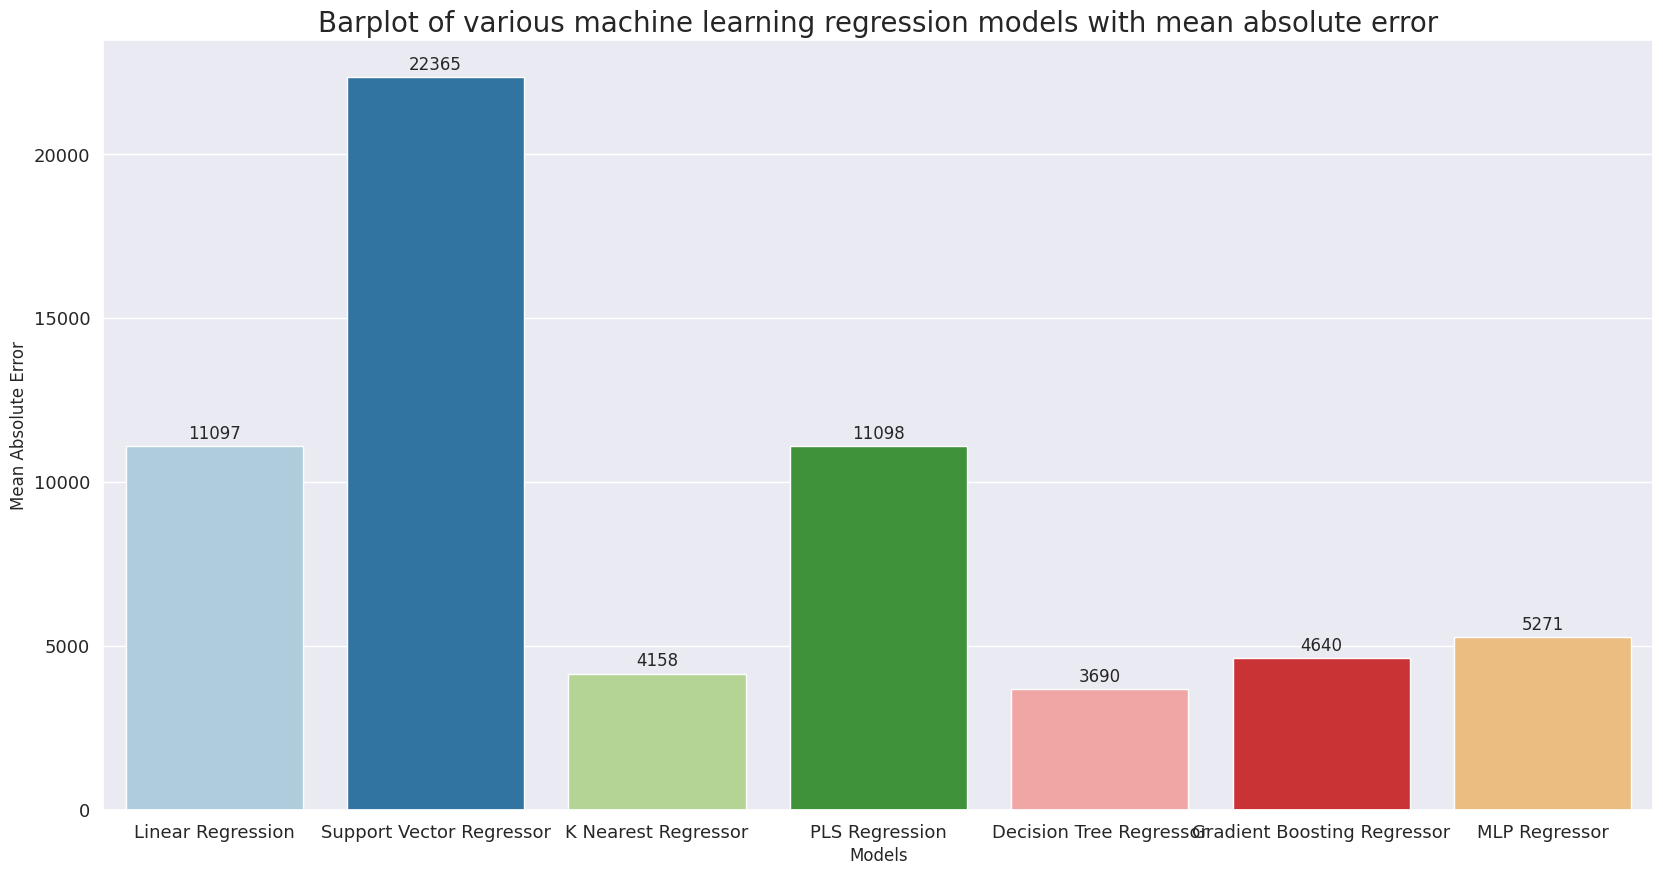

In [309]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

We see that the mean absolute error for the machine learning model 'Support Vector Regressor' is the highest meaning it is the worst performing model. We also see from the graph that the 'Decision Tree Regressor' has the lowest mean absolute error. Thus we can conclude that it is better to use the 'Decision Tree Regressor' for deploying and for predictions in the future as it has the lowest mean absolute error.

**Barplot of machine learning models with mean squared error**



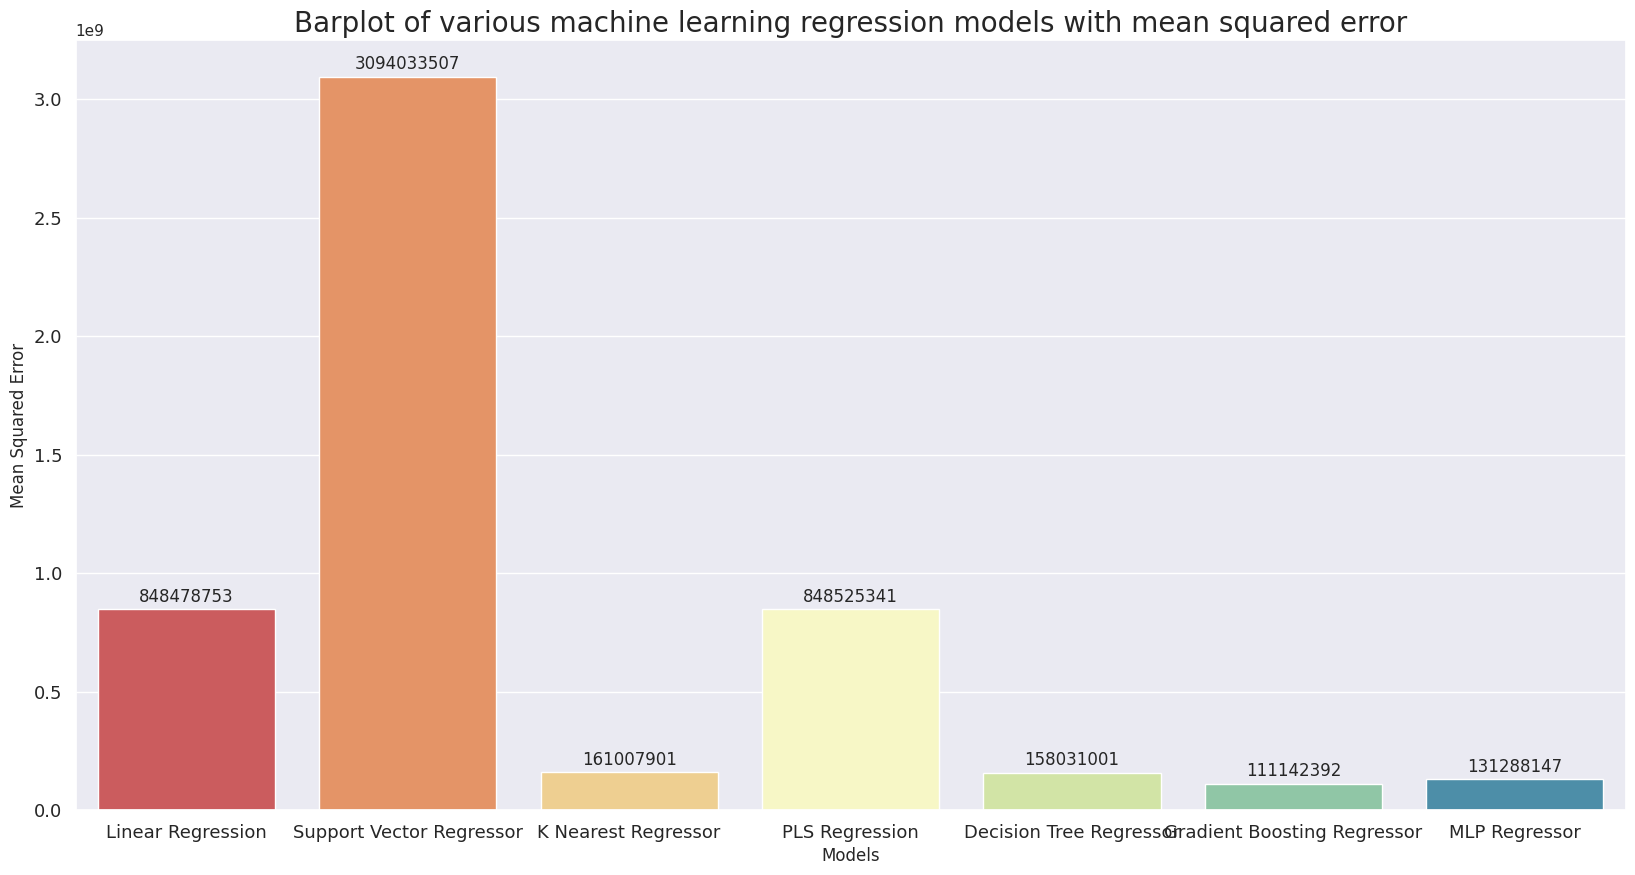

In [311]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

We can see from the graph that 'Gradient Boosting Regressor' has the lowest mean squared error respectively. Therefore, it is one of the best models to use as there is low error for the testing set.


# **Conclusion**

1. From the above analysis we can see that SVM model performs the worst while models like Decision Tree Regressor, Gradient Boosting Reressor and MLP Regressor can be used for production as they are giving the best results.
1. We can see that using different machine learning models would lead to different values of mean absolute error and mean squared error respectively, thus meaning that before production we need to check all models and then select the best one.
2. Convertion of all the categorical features into numerical features before we give those data points to the machine learning models for prediction is necessary.
3. Missing values need to be taken care and have to be replaced by appropriate value or be removed.
5. We have to also remove the outliers in our data as they would completely change some of the important predictions and lead to an increase in the error respectively.
